<a href="https://colab.research.google.com/github/Derinhelm/parser_stat/blob/main/Russian_parser_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Repository cloning

In [1]:
!git clone https://github.com/Derinhelm/parser_stat.git

Cloning into 'parser_stat'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 131 (delta 65), reused 65 (delta 28), pack-reused 0 (from 0)
Receiving objects: 100% (131/131), 26.36 MiB | 5.31 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Updating files: 100% (17/17), done.


In [2]:
import sys
sys.path.append('/content/parser_stat')

In [3]:
!mkdir pics

# Data getting

In [4]:
from data_classes import ConllEntry, Sentence

In [5]:
import pickle

In [6]:
with open('/content/parser_stat/treebank_test_sets/treebank_data.pickle', 'rb') as f:
    treebanks = pickle.load(f)

In [7]:
for t, sent_list in treebanks.items():
    print(t, len(sent_list))
    # checking the index uniqueness
    assert len({s.sent_id for s in sent_list}) == len(sent_list)

gsd 601
pud 1000
syntagrus 8800
poetry 728
taiga 881


In [8]:
treebank_names = ['taiga', 'poetry', 'gsd', 'pud', 'syntagrus']

# Parsing result getting

In [9]:
import pandas as pd

In [10]:
parser_names = ["natasha", "udpipe", "spacy", "deeppavlov", "stanza"]

In [11]:
parser_res = {}
for p in parser_names:
    with open(f'/content/parser_stat/pickle_results/{p}.pickle', 'rb') as f:
       parser_res[p] = pickle.load(f)

In [12]:
for p in parser_names:
  for t in treebanks:
    assert len(treebanks[t]) == len(parser_res[p][t])

In [13]:
[(t.id, t.parent_id, t.relation) for t in parser_res['stanza']['syntagrus'][95].tokens]

[('1', '4', 'obl'),
 ('2', '4', 'case'),
 ('3', '4', 'amod'),
 ('4', '0', 'root'),
 ('5', '4', 'nsubj'),
 ('6', '5', 'flat:foreign'),
 ('7', '5', 'flat:foreign'),
 ('8', '5', 'flat:foreign'),
 ('9', '5', 'flat:foreign'),
 ('10', '4', 'punct'),
 ('1', '2', 'punct'),
 ('2', '4', 'parataxis'),
 ('3', '2', 'punct'),
 ('4', '0', 'root'),
 ('5', '4', 'xcomp'),
 ('6', '5', 'obj'),
 ('7', '8', 'amod'),
 ('8', '6', 'nmod'),
 ('9', '4', 'punct')]

In [14]:
[i for (i, t) in enumerate(parser_res['stanza']['syntagrus'][95].tokens) if t.id == '1']

[0, 10]

In [15]:
parser_res['stanza']['syntagrus'][95].sent_id

'2003Armeniya.xml_96'

In [16]:
for t in treebank_names:
  for p in parser_names:
      print(t, p, len([i for (i, sent) in enumerate(parser_res[p][t])
       if len([t.relation for t in sent.tokens if t.relation == "root"]) > 1]))

taiga natasha 95
taiga udpipe 42
taiga spacy 69
taiga deeppavlov 67
taiga stanza 69
poetry natasha 148
poetry udpipe 43
poetry spacy 24
poetry deeppavlov 50
poetry stanza 65
gsd natasha 83
gsd udpipe 7
gsd spacy 14
gsd deeppavlov 18
gsd stanza 5
pud natasha 98
pud udpipe 7
pud spacy 18
pud deeppavlov 3
pud stanza 4
syntagrus natasha 1073
syntagrus udpipe 57
syntagrus spacy 220
syntagrus deeppavlov 131
syntagrus stanza 190


In [17]:
[i for (i, sent) in enumerate(parser_res['stanza']['syntagrus'])
    if len([t.relation for t in sent.tokens if t.relation == "root"]) > 2]

[6424]

In [18]:
parser_res['stanza']['syntagrus'][6424].sent_id

'2013Martovskaya_revolyutsiya.xml_88'

In [19]:
[(t.id, t.parent_id, t.relation) for t in parser_res['stanza']['syntagrus'][6424].tokens]

[('1', '0', 'root'),
 ('2', '3', 'advmod'),
 ('3', '1', 'nsubj'),
 ('4', '3', 'obl'),
 ('5', '9', 'punct'),
 ('6', '9', 'cc'),
 ('7', '8', 'amod'),
 ('8', '9', 'nsubj'),
 ('9', '1', 'conj'),
 ('10', '12', 'case'),
 ('11', '12', 'det'),
 ('12', '9', 'obl'),
 ('13', '17', 'punct'),
 ('14', '17', 'amod'),
 ('15', '17', 'amod'),
 ('16', '17', 'amod'),
 ('17', '12', 'parataxis'),
 ('18', '19', 'punct'),
 ('19', '17', 'parataxis'),
 ('20', '19', 'flat'),
 ('21', '22', 'amod'),
 ('22', '19', 'nmod'),
 ('23', '19', 'punct'),
 ('24', '1', 'punct'),
 ('1', '3', 'amod'),
 ('2', '3', 'amod'),
 ('3', '0', 'root'),
 ('4', '5', 'punct'),
 ('5', '3', 'parataxis'),
 ('6', '5', 'flat'),
 ('7', '5', 'punct'),
 ('8', '3', 'punct'),
 ('1', '3', 'amod'),
 ('2', '3', 'amod'),
 ('3', '0', 'root'),
 ('4', '5', 'punct'),
 ('5', '3', 'parataxis'),
 ('6', '5', 'flat'),
 ('7', '5', 'punct'),
 ('8', '9', 'punct'),
 ('9', '3', 'conj'),
 ('10', '9', 'nmod'),
 ('11', '12', 'punct'),
 ('12', '10', 'parataxis'),
 ('13',

In [20]:
def shift_token_id(sentence):
  first_token_shift = 0
  for i, t in enumerate(sentence.tokens):
    if t.id == '1':
      first_token_shift = i
    shift_id = str(int(t.id) + first_token_shift)
    if t.parent_id != '0':
      shift_parent_id = str(int(t.parent_id) + first_token_shift)
    else:
      shift_parent_id = '0'
    #print(shift_id, t.id, "    ", shift_parent_id, t.parent_id)
    t.id = shift_id
    t.parent_id = shift_parent_id

In [21]:
for t in treebank_names:
  for p in parser_names:
    for s in parser_res[p][t]:
      shift_token_id(s)

In [22]:
[(t.id, t.parent_id, t.relation) for t in parser_res['stanza']['syntagrus'][6424].tokens]

[('1', '0', 'root'),
 ('2', '3', 'advmod'),
 ('3', '1', 'nsubj'),
 ('4', '3', 'obl'),
 ('5', '9', 'punct'),
 ('6', '9', 'cc'),
 ('7', '8', 'amod'),
 ('8', '9', 'nsubj'),
 ('9', '1', 'conj'),
 ('10', '12', 'case'),
 ('11', '12', 'det'),
 ('12', '9', 'obl'),
 ('13', '17', 'punct'),
 ('14', '17', 'amod'),
 ('15', '17', 'amod'),
 ('16', '17', 'amod'),
 ('17', '12', 'parataxis'),
 ('18', '19', 'punct'),
 ('19', '17', 'parataxis'),
 ('20', '19', 'flat'),
 ('21', '22', 'amod'),
 ('22', '19', 'nmod'),
 ('23', '19', 'punct'),
 ('24', '1', 'punct'),
 ('25', '27', 'amod'),
 ('26', '27', 'amod'),
 ('27', '0', 'root'),
 ('28', '29', 'punct'),
 ('29', '27', 'parataxis'),
 ('30', '29', 'flat'),
 ('31', '29', 'punct'),
 ('32', '27', 'punct'),
 ('33', '35', 'amod'),
 ('34', '35', 'amod'),
 ('35', '0', 'root'),
 ('36', '37', 'punct'),
 ('37', '35', 'parataxis'),
 ('38', '37', 'flat'),
 ('39', '37', 'punct'),
 ('40', '41', 'punct'),
 ('41', '35', 'conj'),
 ('42', '41', 'nmod'),
 ('43', '44', 'punct'),
 (

# Creating token start-end pairs

be_edges - set of dependency tree edges in begin-end format

In [23]:
def create_sent_be_nodes(sent, text_transform):
    token_begin_end = []
    begin_end_token_dict = {}
    sent_text = text_transform(sent.text)
    original_sent_text = text_transform(sent.text)
    del_prefix_len = 0
    tokens = [t for t in sent.tokens if '.' not in t.id]
    for t_i, t in enumerate(tokens):
        token_text = text_transform(t.form)
        t_start = sent_text.find(token_text)
        if t_start == -1:
            print("Error:", sent.sent_id, f"sent_text:{sent_text}, t:{token_text}", t_i)
        else:
            b, e = (del_prefix_len + t_start,
                                  del_prefix_len + t_start + len(token_text))
            token_begin_end.append((t, (b, e)))
            begin_end_token_dict[(b, e)] = t
            del_prefix_len += t_start + len(token_text)
            sent_text = sent_text[t_start + len(token_text):]
            assert text_transform(original_sent_text[b:e]) == text_transform(tokens[t_i].form)
    sent_text = text_transform(sent.text)
    return token_begin_end, begin_end_token_dict

In [24]:
def create_sent_be_edges(sent_be_tokens):
    sent_be_res = {}
    for t_id, (t, t_be) in enumerate(sent_be_tokens): # ellipsis are deleted, so index in sent_be_tokens = token_id
      parent_id = t.parent_id
      if parent_id == '0': # root
        parent_be = (-1, -1)
      else:
        _, parent_be = sent_be_tokens[int(parent_id) - 1]
      sent_be_res[t_be] = (parent_be, t.relation)
    return sent_be_res

In [25]:
from collections import OrderedDict

In [26]:
be_treebanks = {}
be_token_dict_gold = {}
for treebank_n in treebank_names:
    be_treebanks[treebank_n] = OrderedDict()
    be_token_dict_gold[treebank_n] = OrderedDict()
    for i, sent in enumerate(treebanks[treebank_n]):
        be_sent, be_token_dict_gold[treebank_n][sent.sent_id] = create_sent_be_nodes(sent, lambda text: text.lower())
        be_treebanks[treebank_n][sent.sent_id] = create_sent_be_edges(be_sent)

In [27]:
be_treebanks['syntagrus']['2003Artist_mimansa.xml_130']

{(0, 2): ((16, 20), 'nsubj'),
 (3, 15): ((16, 20), 'advmod'),
 (16, 20): ((-1, -1), 'root'),
 (21, 24): ((25, 34), 'det'),
 (25, 34): ((16, 20), 'obj'),
 (35, 43): ((16, 20), 'advmod'),
 (43, 44): ((16, 20), 'punct')}

In [28]:
be_token_dict_gold['gsd']['test-s600']

{(0, 6): <data_classes.ConllEntry at 0x7bcbd34098d0>,
 (7, 15): <data_classes.ConllEntry at 0x7bcbd3409a50>,
 (16, 19): <data_classes.ConllEntry at 0x7bcbd3409bd0>,
 (20, 29): <data_classes.ConllEntry at 0x7bcbd3409d50>,
 (30, 31): <data_classes.ConllEntry at 0x7bcbd3409ed0>,
 (32, 34): <data_classes.ConllEntry at 0x7bcbd340a050>,
 (35, 38): <data_classes.ConllEntry at 0x7bcbd340a250>,
 (39, 45): <data_classes.ConllEntry at 0x7bcbd340a450>,
 (46, 48): <data_classes.ConllEntry at 0x7bcbd340a5d0>,
 (49, 51): <data_classes.ConllEntry at 0x7bcbd340a790>,
 (52, 53): <data_classes.ConllEntry at 0x7bcbd340a990>,
 (53, 54): <data_classes.ConllEntry at 0x7bcbd340ab90>}

{(0, 2): ((16, 20), 'nsubj'),

 (3, 15): ((16, 20), 'advmod'),

 (16, 20): ((-1, -1), 'root'),

 (21, 24): ((25, 34), 'det'),

 (25, 34): ((16, 20), 'obj'),

 (35, 43): ((16, 20), 'advmod'),

 (43, 44): ((16, 20), 'punct')}


In [29]:
be_parser_res = {p: {} for p in parser_names}
for p in parser_names:
  if p == 'deeppavlov':
    transform_fun = lambda text: text.lower().replace('``', '"').replace("''", '"')
  else:
    transform_fun = lambda text: text.lower().replace("''", '"')
  for t in treebank_names:
    be_parser_res[p][t] = OrderedDict()
    for i, sent in enumerate(parser_res[p][t]):
        be_sent, _ = create_sent_be_nodes(sent, transform_fun)
        be_parser_res[p][t][sent.sent_id] = create_sent_be_edges(be_sent)

In [30]:
be_parser_res['stanza']['syntagrus']['2003Armeniya.xml_96']

{(0, 3): ((11, 15), 'obl'),
 (4, 5): ((11, 15), 'case'),
 (6, 10): ((11, 15), 'amod'),
 (11, 15): ((-1, -1), 'root'),
 (16, 24): ((11, 15), 'nsubj'),
 (25, 33): ((16, 24), 'flat:foreign'),
 (34, 42): ((16, 24), 'flat:foreign'),
 (43, 50): ((16, 24), 'flat:foreign'),
 (51, 54): ((16, 24), 'flat:foreign'),
 (54, 55): ((11, 15), 'punct'),
 (56, 57): ((57, 64), 'punct'),
 (57, 64): ((66, 72), 'parataxis'),
 (64, 65): ((57, 64), 'punct'),
 (66, 72): ((-1, -1), 'root'),
 (73, 86): ((66, 72), 'xcomp'),
 (87, 93): ((73, 86), 'obj'),
 (94, 105): ((106, 111), 'amod'),
 (106, 111): ((87, 93), 'nmod'),
 (111, 112): ((66, 72), 'punct')}

((0, 2), ((16, 20), 'nsubj')),

((3, 9), ((16, 20), 'obl')),

((9, 10), ((10, 15), 'punct')),

((10, 15), ((3, 9), 'conj')),

((16, 20), ((-1, -1), 'root')),

((21, 24), ((25, 34), 'det')),

((25, 34), ((16, 20), 'obj')),

((35, 43), ((16, 20), 'advmod')),

((43, 44), ((16, 20), 'punct'))]

# Create graphs for treebank sentences

In [31]:
import networkx as nx

def create_graph(s):
  tokens = [t for t in s.tokens if '.' not in t.id]
  s.graph = nx.DiGraph()
  s.graph.add_node('0', word='root')
  for w in tokens:
    s.graph.add_node(w.id, word=w.form)
  for w in tokens:
    s.graph.add_edge(w.parent_id, w.id, dep_rel=w.relation)

  for t in tokens:
      t.root_depth = nx.shortest_path_length(s.graph, '0', t.id)
  s.graph_depth = max(t.root_depth for t in tokens)

for treebank_n in treebank_names:
    for sent_i in range(len(treebanks[treebank_n])):
      create_graph(treebanks[treebank_n][sent_i])

# Sentence statistics

In [32]:
def calculate_stat(be_gold, be_res_p):
  stat_list = []
  for sent_id in be_gold:
    extra_gold = len(be_gold[sent_id].keys() - be_res_p[sent_id].keys())
    extra_parser = len(be_res_p[sent_id].keys() - be_gold[sent_id].keys())
    tokenisation_matched = len({t_be for t_be in be_res_p[sent_id].keys() & be_gold[sent_id].keys()})
    parent_matched = len({t_be for t_be in be_res_p[sent_id].keys() & be_gold[sent_id].keys()
      if be_res_p[sent_id][t_be][0] == be_gold[sent_id][t_be][0]})
    relation_matched = len({t_be for t_be in be_res_p[sent_id].keys() & be_gold[sent_id].keys()
      if be_res_p[sent_id][t_be] == be_gold[sent_id][t_be]})
    stat_list.append((sent_id, extra_gold, extra_parser, tokenisation_matched,
                      parent_matched, relation_matched, len(be_gold[sent_id])))
  stat = pd.DataFrame(stat_list, columns=['sent_id', 'extra_gold', 'extra_parser', 'tokenisation_matched',
                                             'parent_matched', 'relation_matched', 'token_length'])

  align_uas_precision = stat['parent_matched'] / (stat['extra_parser'] + stat['tokenisation_matched'])
  align_uas_recall = stat['parent_matched'] / (stat['extra_gold'] + stat['tokenisation_matched'])
  align_las_precision = stat['relation_matched'] / (stat['extra_parser'] + stat['tokenisation_matched'])
  align_las_recall = stat['relation_matched'] / (stat['extra_gold'] + stat['tokenisation_matched'])
  align_uas_f = ((2 * align_uas_precision * align_uas_recall) / (align_uas_precision + align_uas_recall)).fillna(0.0)
  align_las_f = ((2 * align_las_precision * align_las_recall) / (align_las_precision + align_las_recall)).fillna(0.0)
  return align_uas_f, align_las_f

In [33]:
align_uas_f = {treebank: {} for treebank in treebank_names}
align_las_f = {treebank: {} for treebank in treebank_names}
for treebank in treebank_names:
  for p in parser_names:
    align_uas_f[treebank][p], align_las_f[treebank][p] = \
        calculate_stat(be_treebanks[treebank], be_parser_res[p][treebank])
align_res = {"uas_f": align_uas_f,
             "las_f": align_las_f}

(0.48936170212765956, 0.48936170212765956)

(0.8723404255319149, 0.8723404255319149)

# Sentence results

In [34]:
from IPython.display import Latex
def create_latex(df):
  return df.style.set_table_styles([
    {'selector': 'toprule', 'props': ':hline;'},
    {'selector': 'midrule', 'props': ':hline;'},
    {'selector': 'bottomrule', 'props': ':hline;'},
   ], overwrite=False).format(lambda s: f"{s:.2f}").to_latex(clines="all;data",  column_format="|l|l|l|l|l|l|")

In [35]:
parser_titles = ["UDPipe", "Stanza", "Natasha", "DeepPavlov", "spacy"]
treebank_titles = ["GSD", "PUD", "SynTagRus", "Poetry", "Taiga"]

In [36]:
import numpy as np

def get_ax(ax, lang_i, x_count, y_count):
    if isinstance(ax[0], np.ndarray):
      x = lang_i // y_count
      y = lang_i % y_count
      return ax[x, y]
    else:
      return ax[lang_i]

##Mean values of sentence f-score

In [37]:
'''uas_mean_df = pd.DataFrame([[align_uas_f[treebank][p].mean()
                          for treebank in treebank_names] for p in parser_names],
                        index=parser_titles, columns=treebank_titles)'''

'uas_mean_df = pd.DataFrame([[align_uas_f[treebank][p].mean()\n                          for treebank in treebank_names] for p in parser_names],\n                        index=parser_titles, columns=treebank_titles)'

In [38]:
uas_mean_df = pd.DataFrame([[align_uas_f[treebank][p].mean()
                          for treebank in treebank_names] for p in parser_names],
                        index=parser_names, columns=treebank_names)

In [39]:
uas_mean_df.round(2)

,taiga,poetry,gsd,pud,syntagrus
natasha,0.70,0.64,0.79,0.88,0.83
udpipe,0.73,0.72,0.79,0.86,0.88
spacy,0.77,0.75,0.84,0.91,0.87
deeppavlov,0.79,0.84,0.83,0.94,0.92
stanza,0.79,0.82,0.85,0.93,0.94


In [40]:
display(Latex(create_latex(uas_mean_df)))

<IPython.core.display.Latex object>

In [41]:
uas_treebank_diff = uas_mean_df.max() - uas_mean_df.min()
uas_treebank_diff.round(2).min(), uas_treebank_diff.round(2).max()

(0.06, 0.21)

In [42]:
uas_treebank_diff

,0
taiga,0.092486
poetry,0.207931
gsd,0.056232
pud,0.071532
syntagrus,0.107464


In [43]:
las_mean_df = pd.DataFrame([[align_las_f[treebank][p].mean()
                          for treebank in treebank_names] for p in parser_names],
                        index=parser_names, columns=treebank_names)

In [44]:
las_mean_df.round(2)

,taiga,poetry,gsd,pud,syntagrus
natasha,0.64,0.58,0.75,0.84,0.78
udpipe,0.66,0.65,0.71,0.79,0.84
spacy,0.70,0.69,0.80,0.87,0.82
deeppavlov,0.72,0.78,0.75,0.86,0.89
stanza,0.72,0.76,0.79,0.87,0.91


In [45]:
display(Latex(create_latex(las_mean_df)))

<IPython.core.display.Latex object>

In [46]:
las_treebank_diff = las_mean_df.max() - las_mean_df.min()
las_treebank_diff.round(2).min(), las_treebank_diff.round(2).max()

(0.08, 0.2)

In [47]:
(uas_mean_df - las_mean_df).round(2)

,taiga,poetry,gsd,pud,syntagrus
natasha,0.06,0.06,0.04,0.05,0.04
udpipe,0.07,0.07,0.09,0.07,0.04
spacy,0.06,0.06,0.04,0.04,0.05
deeppavlov,0.07,0.06,0.08,0.07,0.03
stanza,0.07,0.06,0.06,0.06,0.03


In [48]:
(uas_mean_df - las_mean_df).round(2).min().min(), (uas_mean_df - las_mean_df).round(2).max().max()

(0.03, 0.09)

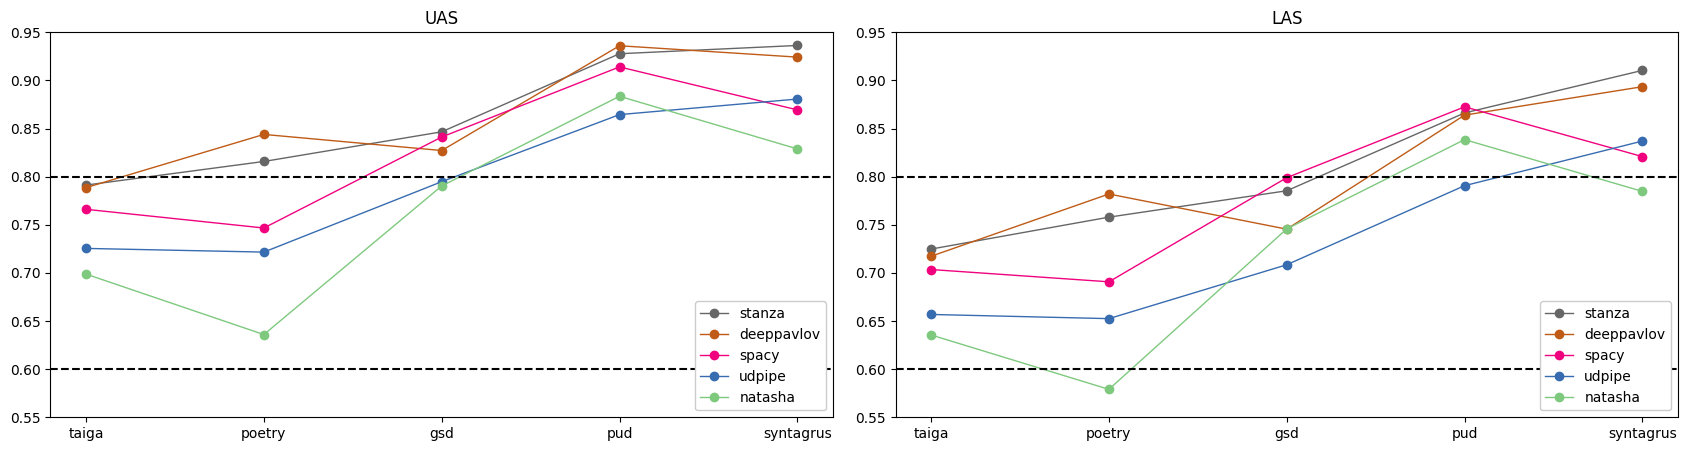

In [49]:
import matplotlib.pyplot as plt
from matplotlib import colormaps

def draw_values(cur_ax, data, title):
    colors = colormaps['Accent'].colors
    colors = (colors[0],) + colors[4:]
    lines = []
    for parser_i, p in list(enumerate(parser_names))[::-1]:
        cur_ax.plot(treebank_names, [data[t][p] for t in treebank_names], color=colors[parser_i], label=p, marker='.', linewidth=1, markersize=12)
    cur_ax.legend(loc='lower right', framealpha=1.0)
    cur_ax.set_title(title)
    cur_ax.axhline(y=0.6, color="black", linestyle="--")
    cur_ax.axhline(y=0.8, color="black", linestyle="--")
    cur_ax.set_ylim([0.55, 0.95])

f, ax = plt.subplots(1, 2, figsize=(21, 5))
plt.subplots_adjust(wspace=0.08, hspace=0.4)
draw_values(ax[0], uas_mean_df, "UAS")
draw_values(ax[1], las_mean_df, "LAS")
plt.savefig("/content/pics/mean_diagram.eps", format='eps', dpi=300, bbox_inches='tight')
plt.savefig("/content/pics/mean_diagram.jpg", format='jpg', dpi=300, bbox_inches='tight')

plt.show()

##UAS/LAS=0.0

In [50]:
uas_0_df = pd.DataFrame([[f"{sum(align_uas_f[treebank][p] == 0.0)} ({sum(align_uas_f[treebank][p] == 0.0) / len(align_uas_f[treebank][p])*100:.0f}%)"
                          for treebank in treebank_names] for p in parser_names],
                        index=parser_titles, columns=treebank_titles)

In [51]:
uas_0_df

,GSD,PUD,SynTagRus,Poetry,Taiga
UDPipe,24 (3%),29 (4%),1 (0%),0 (0%),31 (0%)
Stanza,24 (3%),17 (2%),2 (0%),0 (0%),21 (0%)
Natasha,18 (2%),31 (4%),1 (0%),0 (0%),29 (0%)
DeepPavlov,23 (3%),6 (1%),8 (1%),0 (0%),31 (0%)
spacy,12 (1%),6 (1%),1 (0%),0 (0%),16 (0%)


In [52]:
las_0_df = pd.DataFrame([[f"{sum(align_las_f[treebank][p] == 0.0)} ({sum(align_las_f[treebank][p] == 0.0) / len(align_las_f[treebank][p])*100:.0f}%)"
                          for treebank in treebank_names] for p in parser_names],
                        index=parser_titles, columns=treebank_titles)

In [53]:
las_0_df

,GSD,PUD,SynTagRus,Poetry,Taiga
UDPipe,34 (4%),33 (5%),2 (0%),0 (0%),35 (0%)
Stanza,30 (3%),20 (3%),3 (0%),0 (0%),25 (0%)
Natasha,23 (3%),33 (5%),1 (0%),0 (0%),35 (0%)
DeepPavlov,26 (3%),7 (1%),9 (1%),0 (0%),35 (0%)
spacy,14 (2%),7 (1%),3 (0%),0 (0%),17 (0%)


## UAS/LAS=1.0

In [54]:
uas_1_df = pd.DataFrame([[f"{sum(align_uas_f[treebank][p] == 1.0)} ({sum(align_uas_f[treebank][p] == 1.0) / len(align_uas_f[treebank][p])*100:.0f}%)"
                          for treebank in treebank_names] for p in parser_names],
                        index=parser_titles, columns=treebank_titles)

In [55]:
uas_1_df

,GSD,PUD,SynTagRus,Poetry,Taiga
UDPipe,225 (26%),131 (18%),121 (20%),281 (28%),2397 (27%)
Stanza,246 (28%),192 (26%),137 (23%),282 (28%),3375 (38%)
Natasha,288 (33%),201 (28%),177 (29%),376 (38%),3159 (36%)
DeepPavlov,314 (36%),284 (39%),221 (37%),453 (45%),4472 (51%)
spacy,294 (33%),239 (33%),179 (30%),400 (40%),4708 (54%)


In [56]:
las_1_df = pd.DataFrame([[f"{sum(align_las_f[treebank][p] == 1.0)} ({sum(align_las_f[treebank][p] == 1.0) / len(align_las_f[treebank][p])*100:.0f}%)"
                          for treebank in treebank_names] for p in parser_names],
                        index=parser_titles, columns=treebank_titles)

In [57]:
las_1_df

,GSD,PUD,SynTagRus,Poetry,Taiga
UDPipe,147 (17%),103 (14%),77 (13%),166 (17%),1601 (18%)
Stanza,159 (18%),137 (19%),46 (8%),109 (11%),2279 (26%)
Natasha,199 (23%),152 (21%),119 (20%),226 (23%),1920 (22%)
DeepPavlov,194 (22%),189 (26%),77 (13%),179 (18%),3247 (37%)
spacy,184 (21%),173 (24%),85 (14%),192 (19%),3606 (41%)


## Distributions

### Violinplots

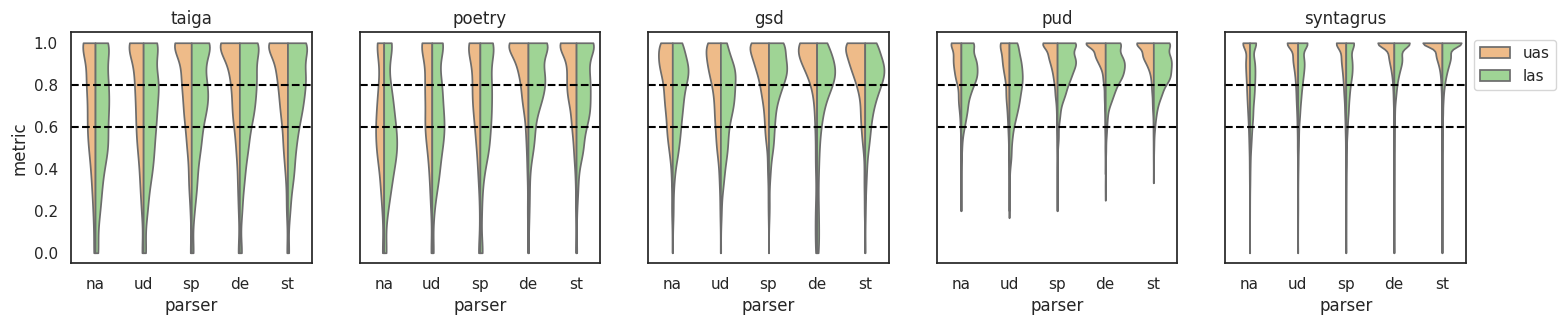

In [58]:
import seaborn as sns
sns.set_theme(style="white", palette=colormaps['tab20'].colors[3::2])
f, axs = plt.subplots(1, 5, figsize=(18, 3), sharey=True)
for treebank_i, t in enumerate(treebank_names):
    t_list = []
    for p in parser_names:
      t_list += [(m, "uas", p[:2]) for m in align_uas_f[t][p]] + [(m, "las", p[:2]) for m in align_las_f[t][p]]
    t_df = pd.DataFrame(t_list, columns=['metric', 'type', 'parser'])
    sns.violinplot(data=t_df, x="parser", y="metric", hue="type", split=True, cut=0, ax=axs[treebank_i], inner=None, legend=treebank_i == len(treebank_names) - 1)
    axs[treebank_i].axhline(y=0.6, color="black", linestyle="--")
    axs[treebank_i].axhline(y=0.8, color="black", linestyle="--")
    if treebank_i == len(treebank_names) - 1:
        axs[treebank_i].legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    axs[treebank_i].set_title(t)
plt.savefig("/content/pics/distribution_diagram.eps", format='eps', dpi=300, bbox_inches='tight')
plt.savefig("/content/pics/distribution_diagram.jpg", format='jpg', dpi=300, bbox_inches='tight')
plt.show()

### Category statistics

In [59]:
from collections import Counter


def category(x):
  if x == 1.0:
    return '1.0'
  elif x >= 0.8:
    return '[0.8, 1.0)'
  elif x >= 0.6:
    return '[0.6, 0.8)'
  return '[0.0, 0.6)'

category_list = ['[0.0, 0.6)', '[0.6, 0.8)', '[0.8, 1.0)', '1.0']

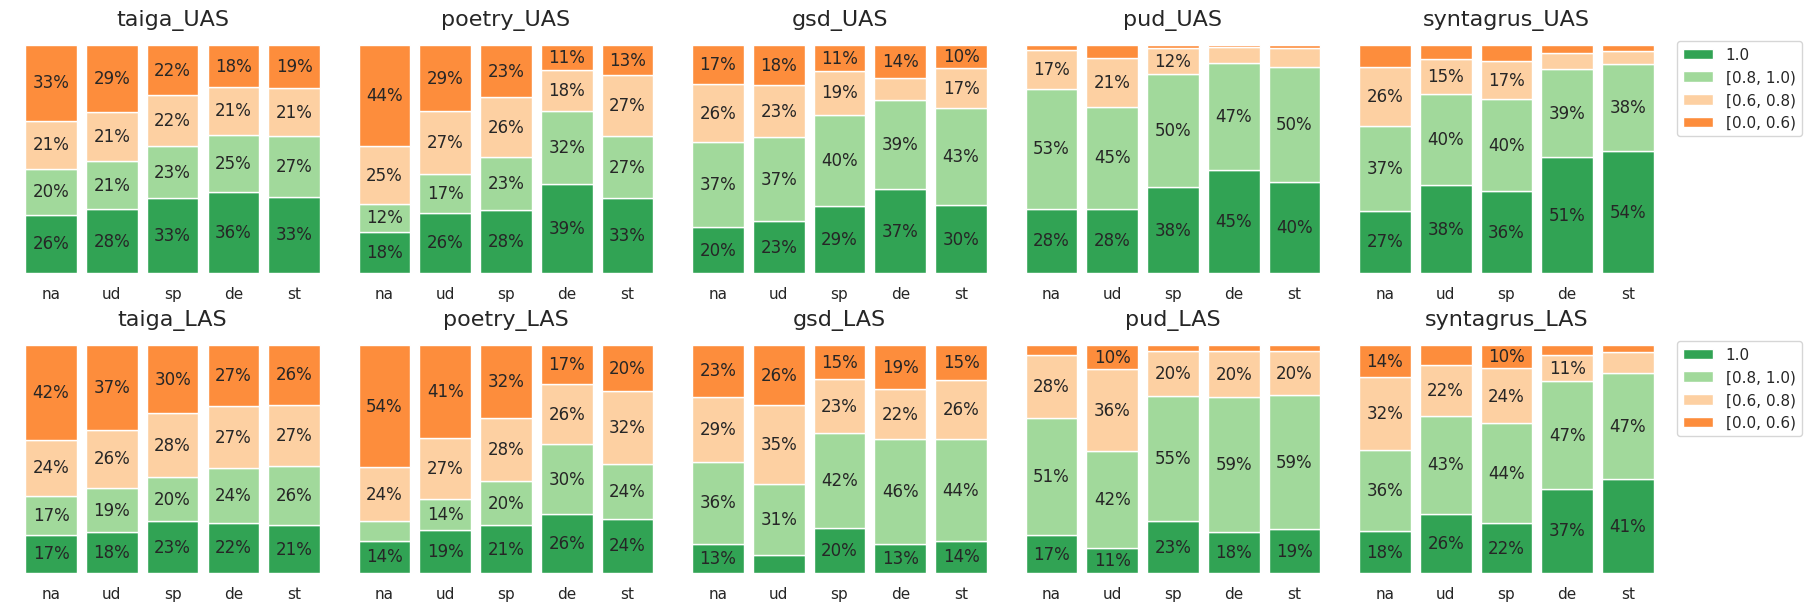

In [60]:
from matplotlib import colormaps

category_list = ['1.0', '[0.8, 1.0)', '[0.6, 0.8)', '[0.0, 0.6)']

def create_stat(t_p_data):
  stat_count = Counter(map(category, list(t_p_data)))
  total = stat_count.total()
  return { cat: stat_count[cat] / total * 100 for cat in category_list}

x_count = 2
y_count = 5
size = 0.5
cmap = colormaps['tab20c'].colors
color_dict = { '[0.0, 0.6)': cmap[5], '[0.6, 0.8)': cmap[7], '[0.8, 1.0)': cmap[10], '1.0': cmap[8] }
f, axs = plt.subplots(x_count, y_count, figsize=(18, 6), sharey=True, constrained_layout=True)
for metric_i, (data, metric, legend_drawing) in enumerate([(align_uas_f, "UAS", True), (align_las_f, "LAS", True)]):
  for treebank_i, t in enumerate(treebank_names):
      cat_df = pd.DataFrame([create_stat(data[t][p]) for p in parser_names],
                            index=[p[:2] for p in parser_names], columns=category_list)
      cat_df.round()
      cur_ax = axs[metric_i][treebank_i]
      #legend_flag = True if treebank_i == len(treebank_names) - 1 else False
      cat_df.plot.bar(stacked=True, color=color_dict, legend=False, ax = cur_ax, width=0.85, rot=0)
      for container in cur_ax.containers:
          cur_ax.bar_label(container, [f"{v:.0f}%" if v >= 10 else "" for v in container.datavalues], label_type='center')
      cur_ax.spines['top'].set_visible(False)
      cur_ax.spines['right'].set_visible(False)
      cur_ax.spines['bottom'].set_visible(False)
      cur_ax.spines['left'].set_visible(False)
      cur_ax.get_yaxis().set_ticks([])
      if legend_drawing and treebank_i == len(treebank_names) - 1:
          cur_ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
      cur_ax.set_title(f"{t}_{metric}", fontdict={'fontsize': 16})
plt.savefig("/content/pics/category_diagram.eps", format='eps', dpi=300, bbox_inches='tight')
plt.savefig("/content/pics/category_diagram.jpg", format='jpg', dpi=300, bbox_inches='tight')
plt.show()

### Boxplots

In [61]:
def draw_hboxplot(ax_plot, data, p):
    b = ax_plot.boxplot(x=data, showfliers=False,showcaps=True,showmeans=True,
            meanprops={'color':'green', 'linewidth': 4, 'linestyle':'solid'},
            medianprops={'color': 'blue', 'linewidth': 3},
            vert=False, meanline=True, widths=0.3)
    ax_plot.set_xlim([-0.02, 1.2])
    ax_plot.get_yaxis().set_visible(False)
    c = b['caps'][0]._x[0]
    ax_plot.text(
          c, # x-coordinate
          0.79, # y-coordinate
          f'{c:.2}', # text
          horizontalalignment='center', # centered
          fontsize=12, # small font size
      )

    u_q1 = data.quantile(0.25)
    ax_plot.text(
        u_q1, # x-coordinate
        0.65, # y-coordinate
        f'{u_q1:.2}', # text
        horizontalalignment='center', # centered
        fontsize=12, # small font size
    )
    u_q2 = data.quantile(0.5)
    if u_q2 != 1.0:
      ax_plot.text(
        u_q2, # x-coordinate
        0.5, # y-coordinate
        f'{u_q2:.2}', # text
        horizontalalignment='center', # centered
        fontsize=12, # small font size
        color='blue'
      )
    u_q3 = data.quantile(0.75)
    if u_q3 != 1.0:
      ax_plot.text(
        u_q3, # x-coordinate
        0.35, # y-coordinate
        f'{u_q3:.2}', # text
        horizontalalignment='center', # centered
        fontsize=12, # small font size
      )

    u_mean = data.mean()
    if u_mean != 1.0:
      ax_plot.text(
            u_mean, # x-coordinate
            1.2, # y-coordinate
            f'{u_mean:.2}', # text
            horizontalalignment='center', # centered
            fontsize=12, # small font size
            color='green'
      )
    #ax_plot.title.set_text(f"{p}_UAS")

In [62]:
def draw_hist(ax_plot, data):
      step = 0.2
      bins1 = [round(step * i, 1) for i in range(0, 6)] + [1.01]
      v_5 = ax_plot.hist(data, bins=bins1, color="white", edgecolor='0.2',
                         linewidth=0.4)
      for i, v in enumerate(v_5[0]):
        rate = round(v / len(data) * 100)
        if rate >= 5:
          if i == len(v_5[0]) - 1:
            text_color = 'red'
          else:
            text_color = '0.2'
          ax_plot.text(i * step, v + len(data) / 20, f"{rate}%", color=text_color, size=12)
      step2 = 0.05
      max2 = 20
      bins2 = [round(step2 * i, 2) for i in range(0, max2 + 1)] + [1.01]
      v_20 = ax_plot.hist(data, bins=bins2)
      v_20[2][-1].set_facecolor('red')
      ax_plot.set_ylim([0, len(data)])
      ax_plot.set_xlim([-0.02, 1.2])
      xlabels = [round(0.2 * i, 2) for i in range(0, 6)]
      ax_plot.set_xticks(xlabels, xlabels, fontdict={'fontsize':12})

In [63]:
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [64]:
def draw_diagrams(data, file_title):
    matplotlib.rc('xtick', labelsize=12)
    matplotlib.rc('ytick', labelsize=12)
    matplotlib.rcParams['axes.linewidth'] = 1

    fig = plt.figure(figsize = (16,24))

    gs = gridspec.GridSpec(4 * len(treebank_names), len(parser_names), figure=fig,
                  wspace=0.1, hspace=0.5,
                  height_ratios=(0.01, 0.01,  0.09, 0.09) * len(treebank_names))


    for treebank_i, t in enumerate(treebank_names):
      ax_t = fig.add_subplot(gs[4 * treebank_i, :])
      ax_t.text(0.5, 0.8, t, va="top", ha="center", fontsize=24, weight="bold")
      if treebank_i != 0:
        ax_t.axhline(y=1, color='gray', lw=1)
      ax_t.axis('off')

      for parser_i, p in enumerate(parser_names):
          ax_tp = fig.add_subplot(gs[4 * treebank_i + 1, parser_i])
          ax_tp.text(0.5, 0.5, p, va="top", ha="center", fontsize=18)
          ax_tp.axis('off')

          ax_h = fig.add_subplot(gs[4 * treebank_i + 2, parser_i])
          if parser_i != 0:
              ax_h.get_yaxis().set_visible(False)
          draw_hist(ax_h, data[t][p])

          ax_b = fig.add_subplot(gs[4 * treebank_i + 3, parser_i])
          draw_hboxplot(ax_b, data[t][p], p)
          ax_b.get_xaxis().set_visible(False)
          ax_b.axis('off')


    plt.savefig(f"{file_title}.eps", format='eps', dpi=300, bbox_inches='tight')
    plt.savefig(f"{file_title}.jpg", format='jpg', dpi=300, bbox_inches='tight')

    plt.show()


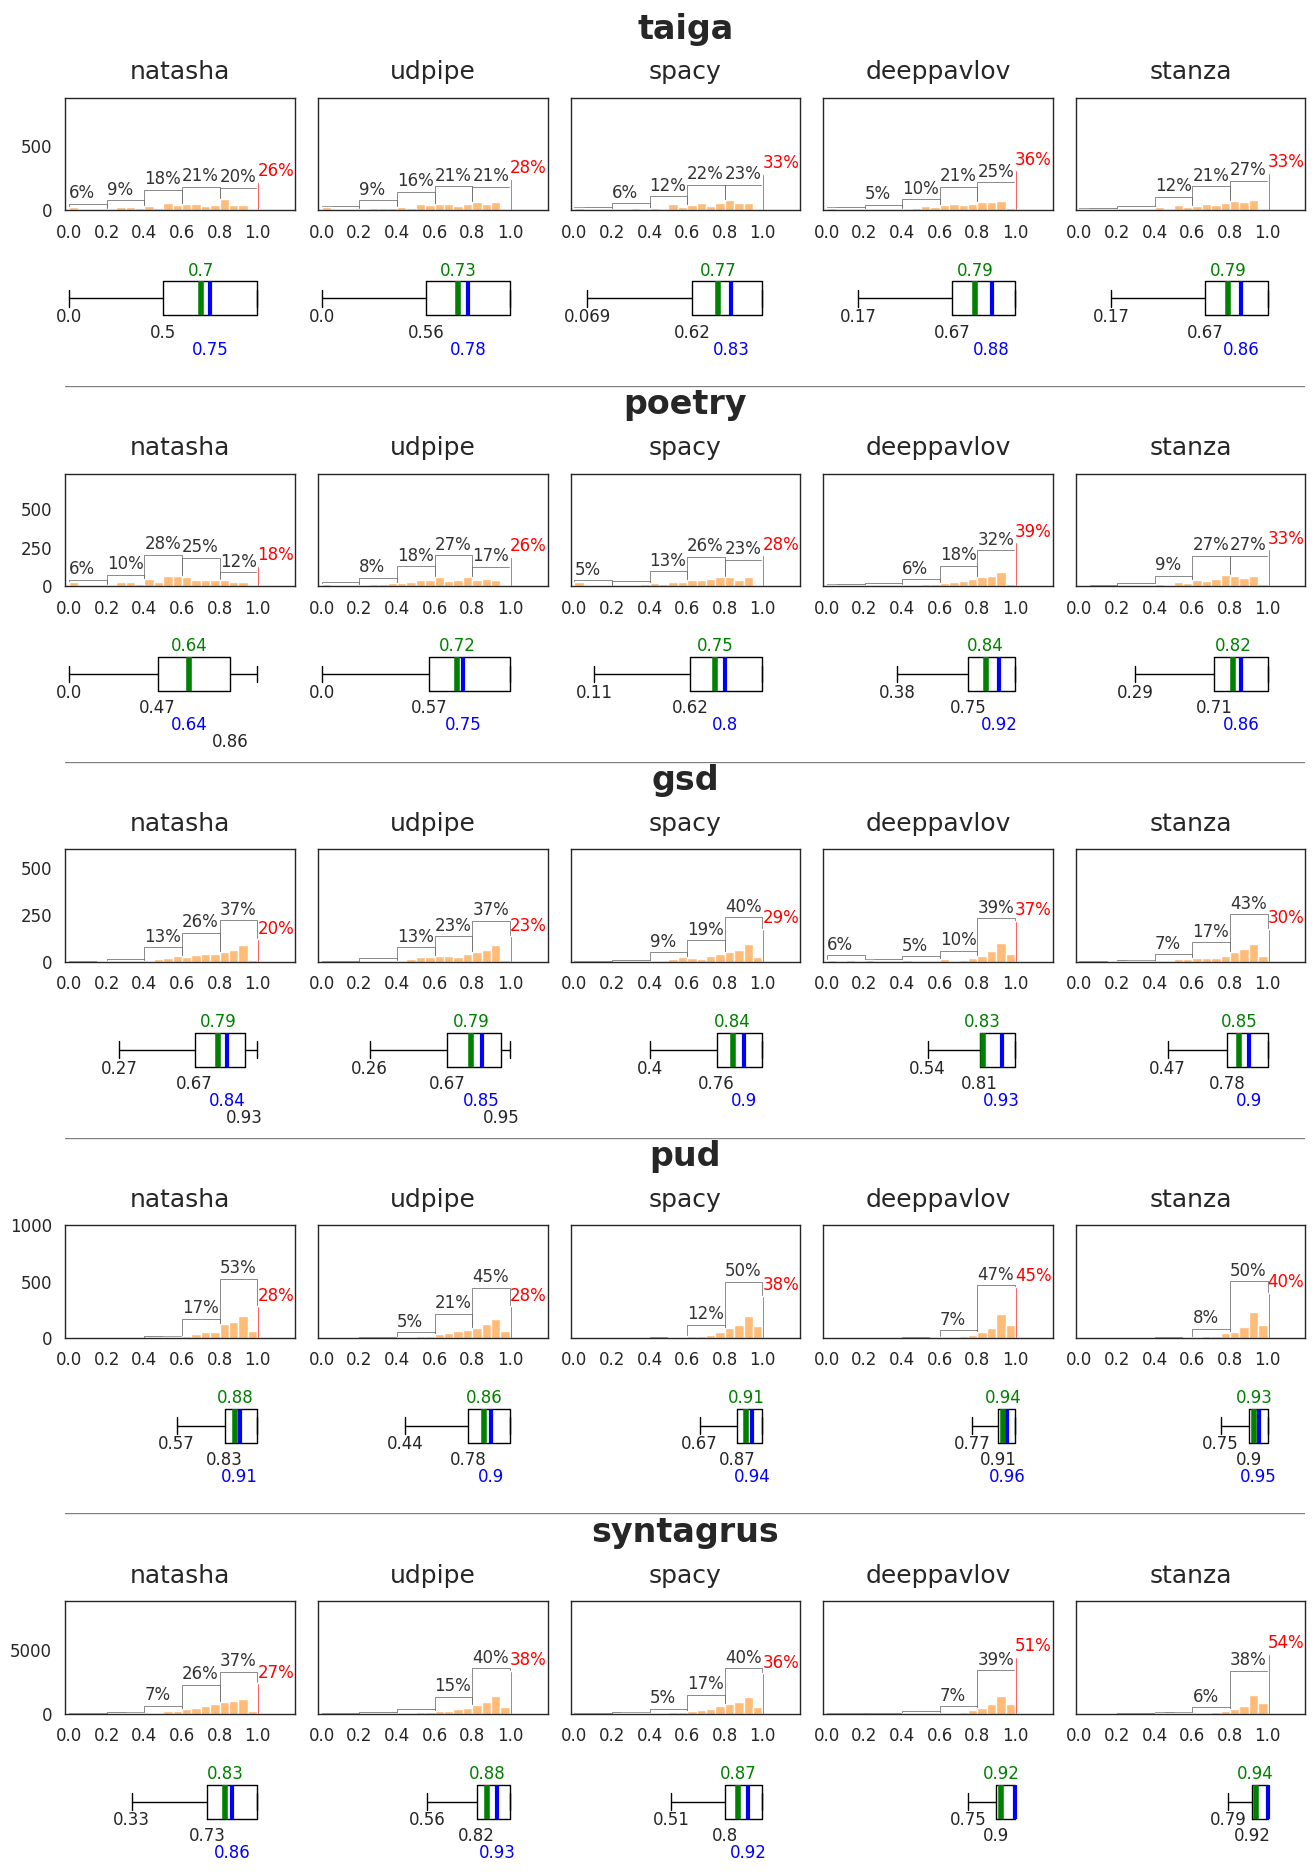

In [65]:
draw_diagrams(align_uas_f, 'pics/uas')

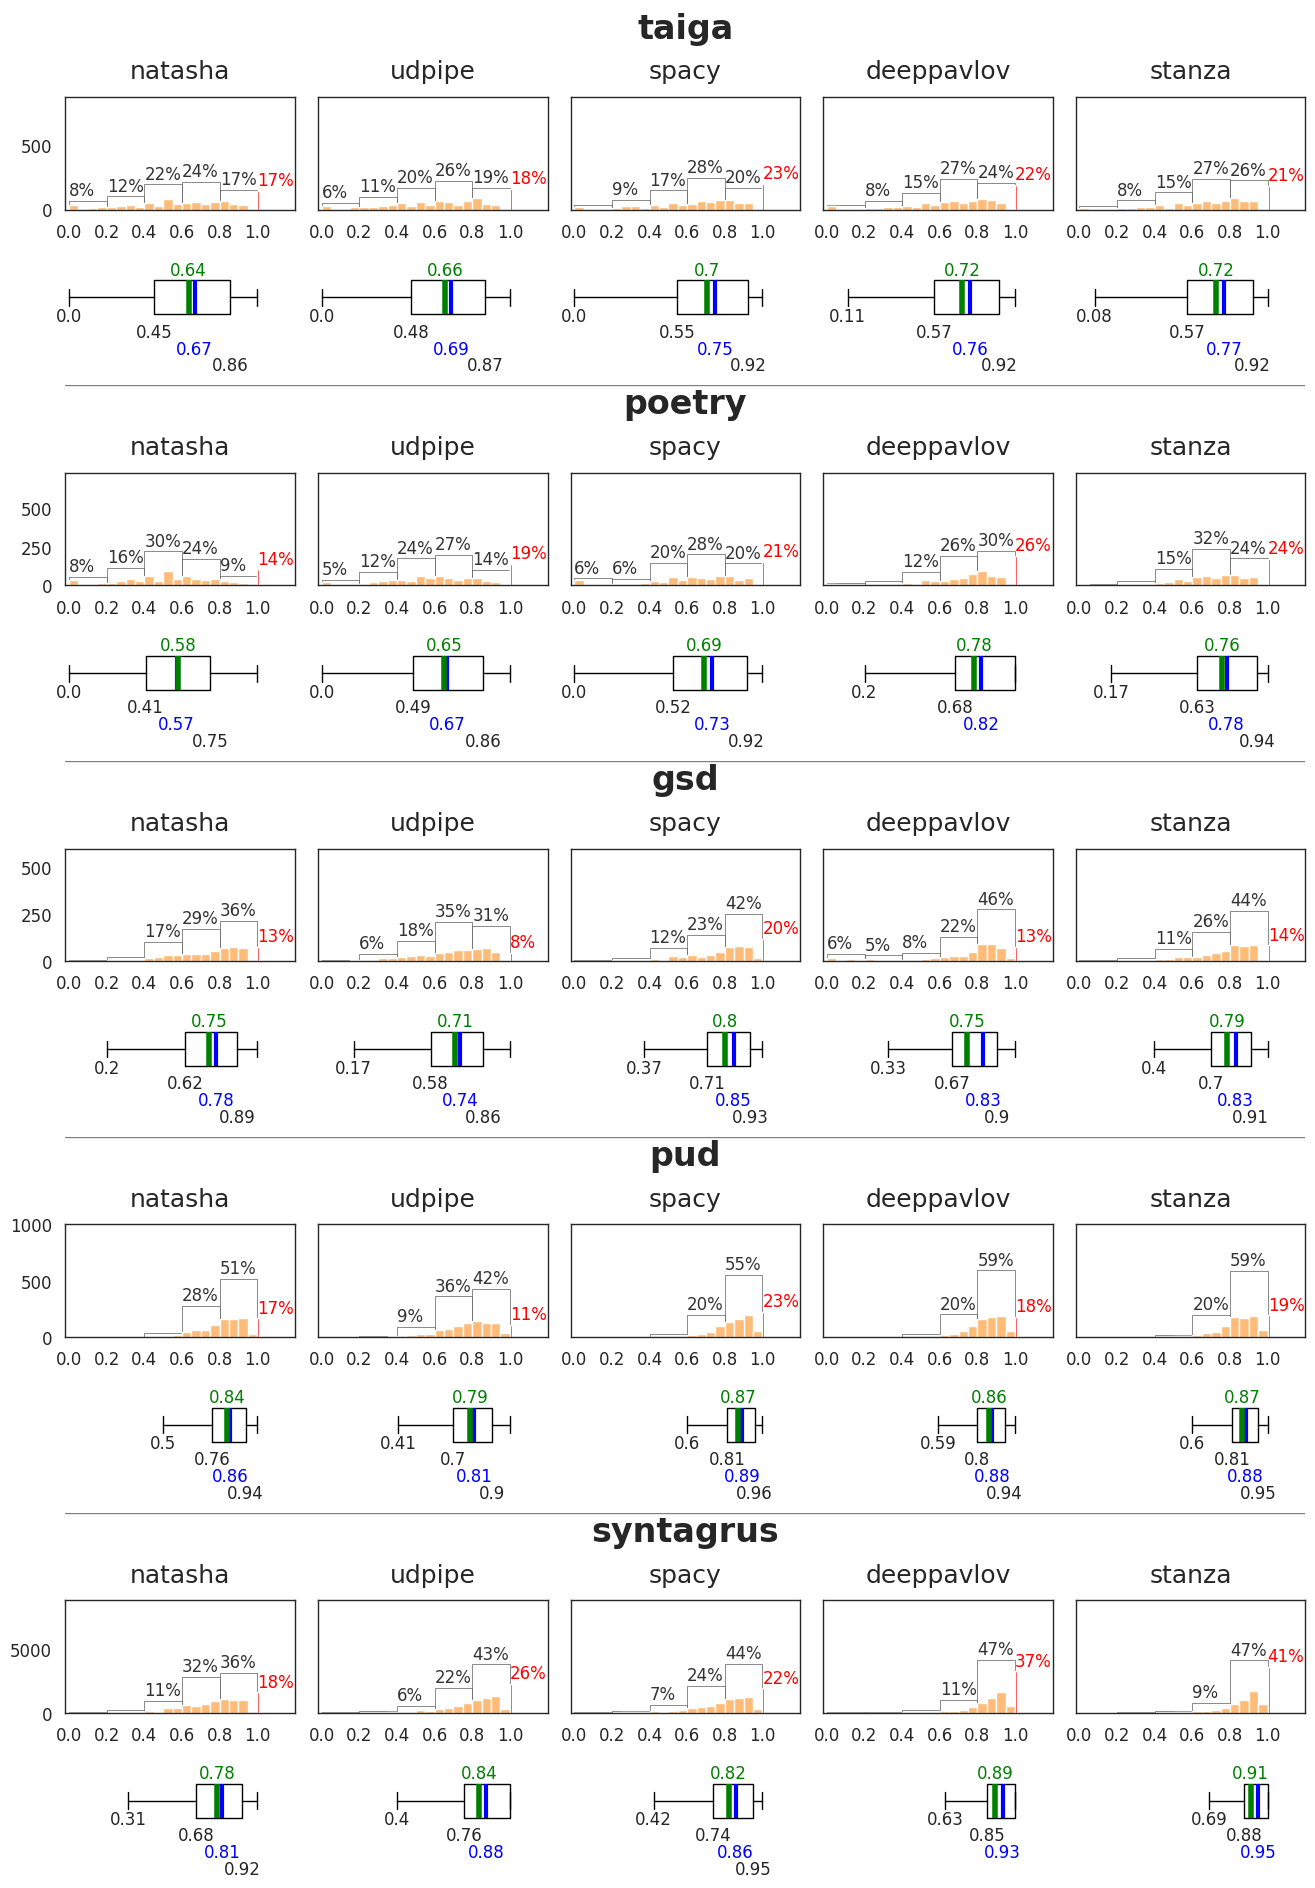

In [66]:
draw_diagrams(align_las_f, 'pics/las')

# Token results

In [67]:
[len(be_treebanks[tr]) for tr in treebank_names]

[881, 728, 601, 1000, 8800]

In [68]:
[[len(be_parser_res[p][tr]) for tr in treebank_names] for p in parser_names]

[[881, 728, 601, 1000, 8800],
 [881, 728, 601, 1000, 8800],
 [881, 728, 601, 1000, 8800],
 [881, 728, 601, 1000, 8800],
 [881, 728, 601, 1000, 8800]]

In [69]:
import pandas as pd

In [70]:
result_df = {}
for tr in treebank_names:
    data_to_df = []
    for sent_i, sent_be in be_treebanks[tr].items():
        for gold_token_be, (gold_parent, gold_type) in sent_be.items():
          token_dict = { 'sent_i': sent_i, 'gold_token': gold_token_be,
                        'gold_parent': gold_parent, 'gold_type': gold_type}
          gold_token = be_token_dict_gold[tr][sent_i][gold_token_be]
          token_dict['gold_pos'] = gold_token.pos
          token_dict['gold_relation'] = gold_token.relation
          token_dict['gold_depth'] = gold_token.root_depth
          for p in parser_names:
            if gold_token_be in be_parser_res[p][tr][sent_i]:
              token_dict[f'{p}_parent'], token_dict[f'{p}_type'] = be_parser_res[p][tr][sent_i][gold_token_be]
            else:
              token_dict[f'{p}_parent'], token_dict[f'{p}_type'] = None, None

          data_to_df.append( token_dict)

    result_df[tr] = pd.DataFrame(data_to_df)

In [71]:
result_df[tr]

,sent_i,gold_token,gold_parent,gold_type,gold_pos,gold_relation,gold_depth,natasha_parent,natasha_type,udpipe_parent,udpipe_type,spacy_parent,spacy_type,deeppavlov_parent,deeppavlov_type,stanza_parent,stanza_type
0,2003Armeniya.xml_1,"(0, 1)","(12, 18)",case,ADP,case,3,"(12, 18)",case,"(12, 18)",case,"(12, 18)",case,"(12, 18)",case,"(12, 18)",case
1,2003Armeniya.xml_1,"(2, 11)","(12, 18)",amod,ADJ,amod,3,"(12, 18)",amod,"(12, 18)",amod,"(12, 18)",amod,"(12, 18)",amod,"(12, 18)",amod
2,2003Armeniya.xml_1,"(12, 18)","(60, 70)",obl,NOUN,obl,2,"(60, 70)",obl,"(60, 70)",obl,"(60, 70)",obl,"(60, 70)",obl,"(60, 70)",obl
3,2003Armeniya.xml_1,"(19, 26)","(12, 18)",nmod,NOUN,nmod,3,"(12, 18)",nmod,"(12, 18)",nmod,"(12, 18)",nmod,"(12, 18)",nmod,"(12, 18)",nmod
4,2003Armeniya.xml_1,"(27, 32)","(60, 70)",obj,NOUN,obj,2,"(60, 70)",nsubj,"(60, 70)",nsubj,"(60, 70)",nsubj,"(60, 70)",nsubj,"(60, 70)",nsubj
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157713,2020_RFFIMoskva_2042.xml_742,"(37, 40)","(29, 36)",nsubj,PRON,nsubj,3,"(29, 36)",nsubj,"(29, 36)",nsubj,"(29, 36)",nsubj,"(29, 36)",nsubj,"(29, 36)",nsubj
157714,2020_RFFIMoskva_2042.xml_742,"(41, 42)","(54, 64)",cc,CCONJ,cc,4,"(54, 64)",cc,"(54, 64)",cc,"(54, 64)",cc,"(54, 64)",cc,"(54, 64)",cc
157715,2020_RFFIMoskva_2042.xml_742,"(43, 53)","(54, 64)",advmod,ADV,advmod,4,"(54, 64)",advmod,"(54, 64)",advmod,"(54, 64)",advmod,"(54, 64)",advmod,"(54, 64)",advmod
157716,2020_RFFIMoskva_2042.xml_742,"(54, 64)","(29, 36)",conj,VERB,conj,3,"(29, 36)",conj,"(29, 36)",conj,"(29, 36)",conj,"(29, 36)",conj,"(29, 36)",conj


In [72]:
def f(d):
  #print(d, "\n\n")
  right_amount = len(d[d['gold_parent'] == d['parser_parent']])
  return (right_amount, right_amount / len(d), len(d))

def create_property_stat(df, p, prop):
    d = df.rename(columns={ f'{p}_parent': 'parser_parent' }).groupby(prop)[['gold_parent', 'parser_parent']].apply(f).to_frame('group_stat')
    d['right'] = d['group_stat'].apply(lambda x: x[0])
    d['right_percent'] = d['group_stat'].apply(lambda x: x[1])
    d['all'] = d['group_stat'].apply(lambda x: x[2])
    d.drop('group_stat', axis=1, inplace=True)
    return d

In [73]:
relation_stat = {p: {} for p in parser_names}
for p in parser_names:
  relation_stat[p] = {}
  for tr in treebank_names:
    relation_stat[p][tr] = create_property_stat(result_df[tr], p, 'gold_relation')

In [74]:
for p in parser_names:
  for tr in treebank_names:
    print(p, tr, relation_stat[p][tr].loc['punct'].round(2).to_dict())

natasha taiga {'right': 1268.0, 'right_percent': 0.6, 'all': 2099.0}
natasha poetry {'right': 1176.0, 'right_percent': 0.55, 'all': 2130.0}
natasha gsd {'right': 1216.0, 'right_percent': 0.58, 'all': 2093.0}
natasha pud {'right': 2518.0, 'right_percent': 0.85, 'all': 2977.0}
natasha syntagrus {'right': 21540.0, 'right_percent': 0.73, 'all': 29463.0}
udpipe taiga {'right': 1324.0, 'right_percent': 0.63, 'all': 2099.0}
udpipe poetry {'right': 1152.0, 'right_percent': 0.54, 'all': 2130.0}
udpipe gsd {'right': 1216.0, 'right_percent': 0.58, 'all': 2093.0}
udpipe pud {'right': 2254.0, 'right_percent': 0.76, 'all': 2977.0}
udpipe syntagrus {'right': 23835.0, 'right_percent': 0.81, 'all': 29463.0}
spacy taiga {'right': 1438.0, 'right_percent': 0.69, 'all': 2099.0}
spacy poetry {'right': 1440.0, 'right_percent': 0.68, 'all': 2130.0}
spacy gsd {'right': 1380.0, 'right_percent': 0.66, 'all': 2093.0}
spacy pud {'right': 2641.0, 'right_percent': 0.89, 'all': 2977.0}
spacy syntagrus {'right': 23285

### Wrong tokens in sentences

In [75]:
result_df[tr][result_df[tr]['udpipe_parent'].isnull()]

,sent_i,gold_token,gold_parent,gold_type,gold_pos,gold_relation,gold_depth,natasha_parent,natasha_type,udpipe_parent,udpipe_type,spacy_parent,spacy_type,deeppavlov_parent,deeppavlov_type,stanza_parent,stanza_type
1466,2003Armeniya.xml_82,"(115, 117)","(104, 114)",nmod,PROPN,nmod,3,"(104, 114)",nmod,None,None,"(104, 114)",nmod,"(104, 114)",nmod,"(104, 114)",nmod
1467,2003Armeniya.xml_82,"(117, 118)","(49, 56)",punct,PUNCT,punct,2,"(49, 56)",punct,None,None,"(49, 56)",punct,"(49, 56)",punct,"(49, 56)",punct
1715,2003Armeniya.xml_95,"(20, 21)","(21, 23)",punct,PUNCT,punct,4,"(13, 18)",punct,None,None,None,None,None,None,"(13, 18)",punct
1716,2003Armeniya.xml_95,"(21, 23)","(13, 18)",flat:foreign,X,flat:foreign,3,"(13, 18)",appos,None,None,None,None,None,None,"(13, 18)",flat:foreign
1789,2003Armeniya.xml_99,"(64, 67)","(54, 63)",flat:foreign,PROPN,flat:foreign,4,"(54, 63)",appos,None,None,"(54, 63)",appos,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153377,2020_RFFIMoskva_2042.xml_400,"(35, 45)","(29, 34)",nmod,PROPN,nmod,4,None,None,None,None,"(29, 34)",nmod,None,None,"(29, 34)",nmod
153378,2020_RFFIMoskva_2042.xml_400,"(45, 46)","(46, 54)",punct,PUNCT,punct,6,None,None,None,None,"(29, 34)",nmod,None,None,"(46, 54)",punct
155453,2020_RFFIMoskva_2042.xml_560,"(2, 7)","(8, 13)",discourse,INTJ,discourse,2,"(-1, -1)",root,None,None,None,None,"(8, 16)",parataxis,"(8, 13)",discourse
156384,2020_RFFIMoskva_2042.xml_631,"(2, 5)","(-1, -1)",root,PRON,root,1,None,None,None,None,"(11, 15)",det,None,None,None,None


In [76]:
def f_count(ser):
    return len(ser[ser['gold_parent'] != ser['parser_parent']])
tr = 'taiga'
p = 'stanza'
result_df[tr].rename(columns={ f'{p}_parent': 'parser_parent' }).groupby('sent_i')[['gold_parent', f'parser_parent']].apply(f_count).value_counts()

,count
0,294
1,191
2,96
3,67
4,67
5,47
6,34
7,33
8,17
9,10


## gold_relation

In [77]:
d = create_property_stat(result_df[tr], 'udpipe', 'gold_relation')

In [78]:
relation_stat['udpipe'][tr]['all'].sum() * 0.05

np.float64(513.7)

In [79]:
sum(d['all']) * 0.05

513.7

In [80]:
d[d['all'] > 7885]

,right,right_percent,all
gold_relation,,,


In [81]:
d[d['right_percent'] < 0.8]

,right,right_percent,all
gold_relation,,,
acl,37,0.606557,61
acl:relcl,37,0.787234,47
advcl,48,0.558140,86
appos,59,0.567308,104
ccomp,37,0.649123,57
compound,1,0.142857,7
conj,342,0.547200,625
cop,24,0.533333,45
csubj,33,0.702128,47


In [82]:
for p in parser_names:
  for tr in treebank_names:
    print(p, tr, "\n", result_df[tr][result_df[tr]['gold_parent'] != result_df[tr][f'{p}_parent']]['gold_relation'].value_counts(normalize=True).head(5))
  print()

natasha taiga 
 gold_relation
punct        0.247986
conj         0.099970
root         0.090719
parataxis    0.071620
nsubj        0.061176
Name: proportion, dtype: float64
natasha poetry 
 gold_relation
punct    0.232910
conj     0.142334
nsubj    0.073242
obl      0.071533
root     0.063477
Name: proportion, dtype: float64
natasha gsd 
 gold_relation
punct    0.319723
nmod     0.109005
conj     0.085673
obl      0.085308
nsubj    0.050310
Name: proportion, dtype: float64
natasha pud 
 gold_relation
punct    0.177083
obl      0.121528
nmod     0.118441
conj     0.076389
nsubj    0.055170
Name: proportion, dtype: float64
natasha syntagrus 
 gold_relation
punct    0.244311
conj     0.105489
obl      0.086401
nmod     0.075578
nsubj    0.054487
Name: proportion, dtype: float64

udpipe taiga 
 gold_relation
punct        0.273369
conj         0.099824
root         0.079365
parataxis    0.073721
nsubj        0.056437
Name: proportion, dtype: float64
udpipe poetry 
 gold_relation
punct    0.

## gold_depth

In [83]:
result_df['taiga']

,sent_i,gold_token,gold_parent,gold_type,gold_pos,gold_relation,gold_depth,natasha_parent,natasha_type,udpipe_parent,udpipe_type,spacy_parent,spacy_type,deeppavlov_parent,deeppavlov_type,stanza_parent,stanza_type
0,1,"(0, 3)","(4, 9)",advmod,ADV,advmod,3,"(4, 9)",advmod,"(4, 9)",obl,"(29, 33)",nsubj,"(4, 9)",obl,"(4, 9)",obl
1,1,"(4, 9)","(12, 18)",obl,NOUN,obl,2,"(29, 33)",obl,"(-1, -1)",root,"(0, 3)",nmod,"(29, 33)",obl,"(12, 18)",nmod
2,1,"(10, 11)","(12, 18)",case,ADP,case,2,"(12, 18)",case,"(12, 18)",case,"(12, 18)",case,"(12, 18)",case,"(12, 18)",case
3,1,"(12, 18)","(-1, -1)",root,NOUN,root,1,"(29, 33)",obl,"(4, 9)",nmod,"(29, 33)",obl,"(29, 33)",obl,"(-1, -1)",root
4,1,"(19, 22)","(12, 18)",nmod,PROPN,nmod,2,"(12, 18)",nmod,"(12, 18)",nmod,"(12, 18)",nmod,"(12, 18)",nmod,"(12, 18)",nmod
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10269,7281,"(7, 13)","(-1, -1)",root,VERB,root,1,"(-1, -1)",root,"(-1, -1)",root,"(-1, -1)",root,"(-1, -1)",root,"(-1, -1)",root
10270,7281,"(14, 19)","(7, 13)",nsubj,NOUN,nsubj,2,"(7, 13)",nsubj,"(7, 13)",nsubj,"(7, 13)",nsubj,"(7, 13)",nsubj,"(7, 13)",nsubj
10271,7281,"(20, 23)","(24, 35)",case,ADP,case,4,"(24, 35)",case,"(24, 35)",case,"(24, 35)",case,"(24, 35)",case,"(24, 35)",case
10272,7281,"(24, 35)","(14, 19)",nmod,NOUN,nmod,3,"(14, 19)",nmod,"(14, 19)",nmod,"(14, 19)",nmod,"(14, 19)",nmod,"(14, 19)",nmod


In [84]:
gold_depth_stat = { p: {} for tr in treebank_names }
for p in parser_names:
  gold_depth_stat[p] = {}
  for tr in treebank_names:
    gold_depth_stat[p][tr] = create_property_stat(result_df[tr], p, 'gold_depth')

In [85]:
gold_depth_stat[p][tr]["right"].to_dict()

{1: 8433,
 2: 35069,
 3: 38357,
 4: 27987,
 5: 17697,
 6: 9998,
 7: 5039,
 8: 2495,
 9: 1137,
 10: 461,
 11: 209,
 12: 69,
 13: 33,
 14: 10,
 15: 3}

<BarContainer object of 15 artists>

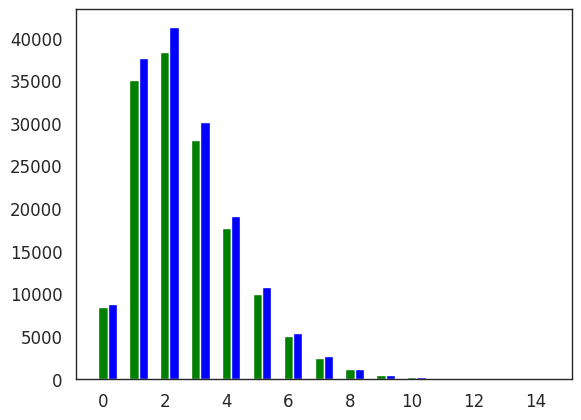

In [86]:
positions = np.array(range(15))
d = gold_depth_stat[p][tr]["right"].to_dict()
plt.bar(positions, height=d.values(), width=0.3, color='green')
d = gold_depth_stat[p][tr]["all"].to_dict()
plt.bar(positions + 0.3, height=d.values(), width=0.3, color='blue')

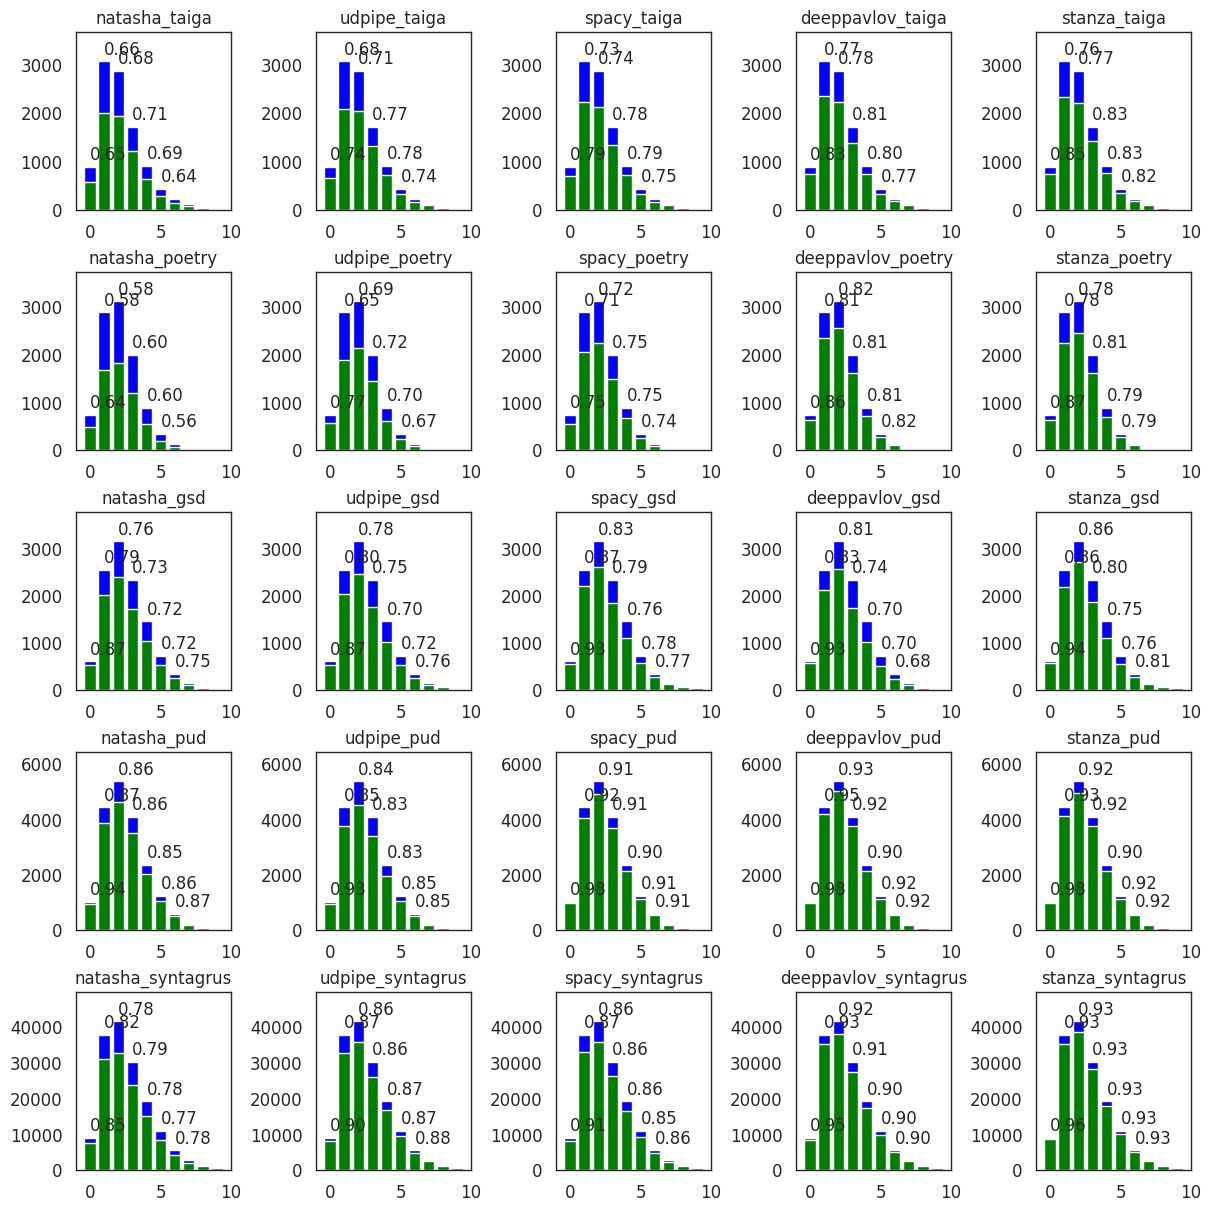

In [87]:
f, axs = plt.subplots(len(treebank_names), len(parser_names), figsize=(12, 12), constrained_layout=True)

for tr_i, tr in enumerate(treebank_names):
  for p_i, p in enumerate(parser_names):
    max_x = min(len(gold_depth_stat[p][tr]), 10)
    positions = np.array(range(max_x))
    d = gold_depth_stat[p][tr]["all"].to_dict()
    bar_all = axs[tr_i][p_i].bar(positions, height=list(d.values())[:max_x], width=0.8, color='blue')
    d = gold_depth_stat[p][tr]["right"].to_dict()
    bar_right = axs[tr_i][p_i].bar(positions, height=list(d.values())[:max_x], width=0.8, color='green')
    max_y = max(bar_all.datavalues)
    for b_i in range(max_x):
      axs[tr_i][p_i].text(b_i, bar_all.datavalues[b_i] + 0.05 * max_y,
                          f"{ bar_right.datavalues[b_i] / bar_all.datavalues[b_i]:.2f}" if bar_all.datavalues[b_i] > 0.1 * max_y else "")
    axs[tr_i][p_i].set_title(f"{p}_{tr}")
    axs[tr_i][p_i].set_xlim(-1, 10)
    axs[tr_i][p_i].set_ylim(0, 1.2 * max_y)

#plt.legend()

In [88]:
(gold_depth_stat[p][tr]['right'].sum() / gold_depth_stat[p][tr]['all'].sum()).round(2)

np.float64(0.93)

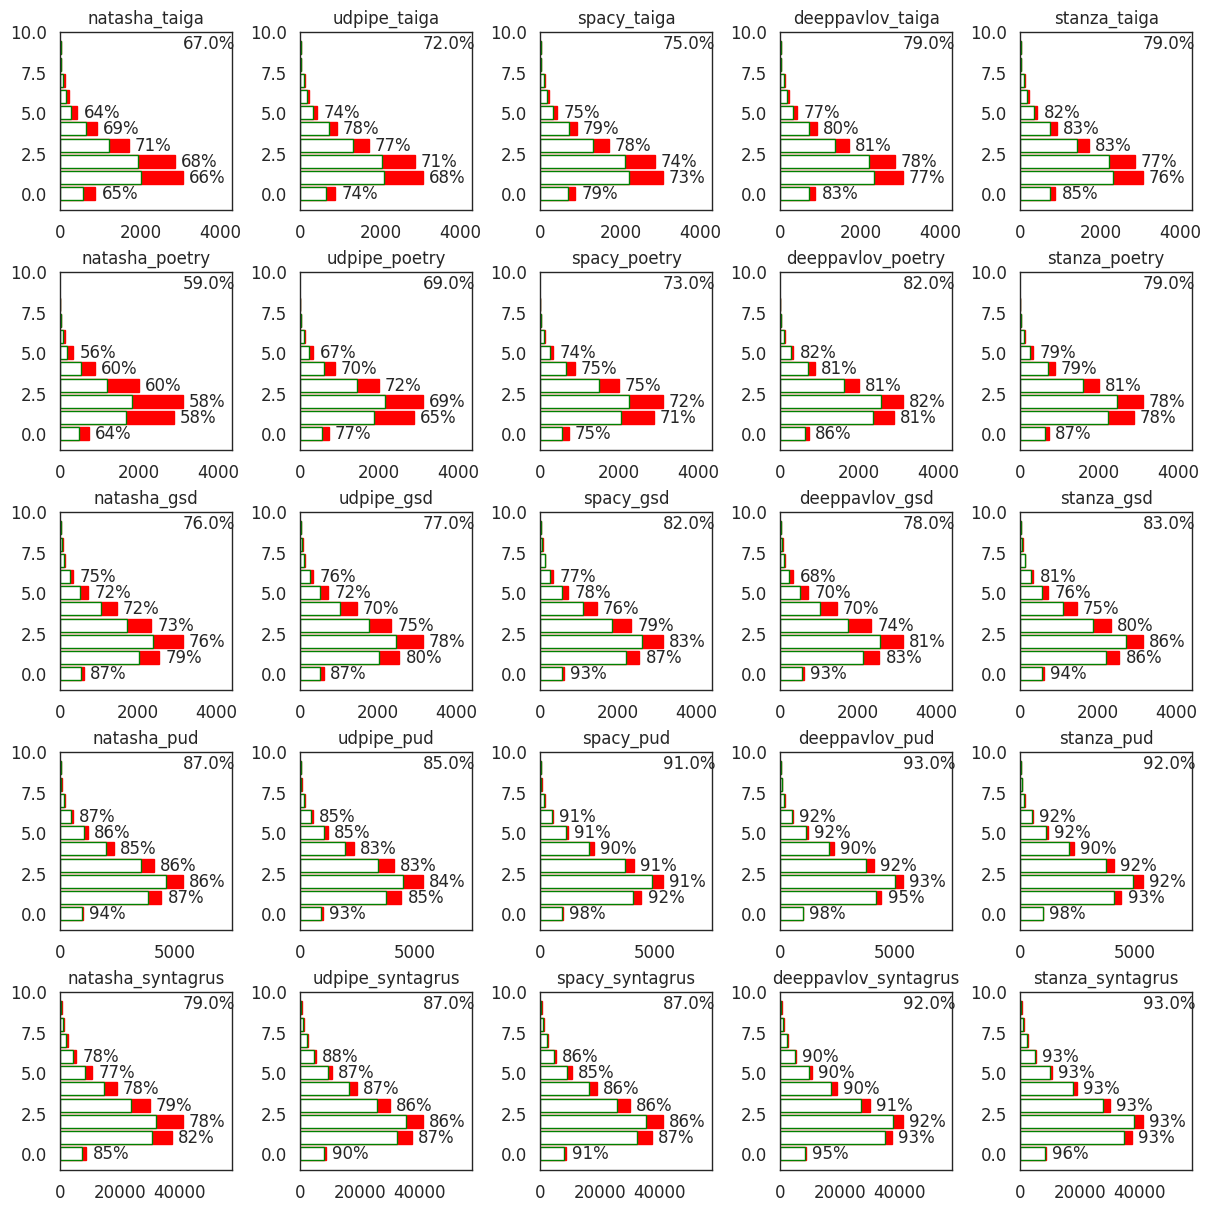

In [89]:
f, axs = plt.subplots(len(treebank_names), len(parser_names), figsize=(12, 12), constrained_layout=True)

for tr_i, tr in enumerate(treebank_names):
  for p_i, p in enumerate(parser_names):
    max_y = min(len(gold_depth_stat[p][tr]), 10)
    positions = np.array(range(max_y))
    d = gold_depth_stat[p][tr]["all"].to_dict()
    bar_all = axs[tr_i][p_i].barh(positions, width=list(d.values())[:max_y], height=0.8, color='red', edgecolor='red')
    d = gold_depth_stat[p][tr]["right"].to_dict()
    bar_right = axs[tr_i][p_i].barh(positions, width=list(d.values())[:max_y], height=0.8, color='white', edgecolor='green')
    max_x = max(bar_all.datavalues)
    for b_i in range(max_y):
      axs[tr_i][p_i].text(bar_all.datavalues[b_i] + 0.05 * max_x, b_i - 0.3,
                          f"{ bar_right.datavalues[b_i] / bar_all.datavalues[b_i] * 100:.0f}%" if bar_all.datavalues[b_i] > 0.1 * max_x else "")
    axs[tr_i][p_i].set_title(f"{p}_{tr}")
    axs[tr_i][p_i].text(max_x, 9, f"{(gold_depth_stat[p][tr]['right'].sum() / gold_depth_stat[p][tr]['all'].sum() * 100).round(0)}%")
    axs[tr_i][p_i].set_ylim(-1, 10)
    axs[tr_i][p_i].set_xlim(0, 1.4 * max_x)

#plt.legend()

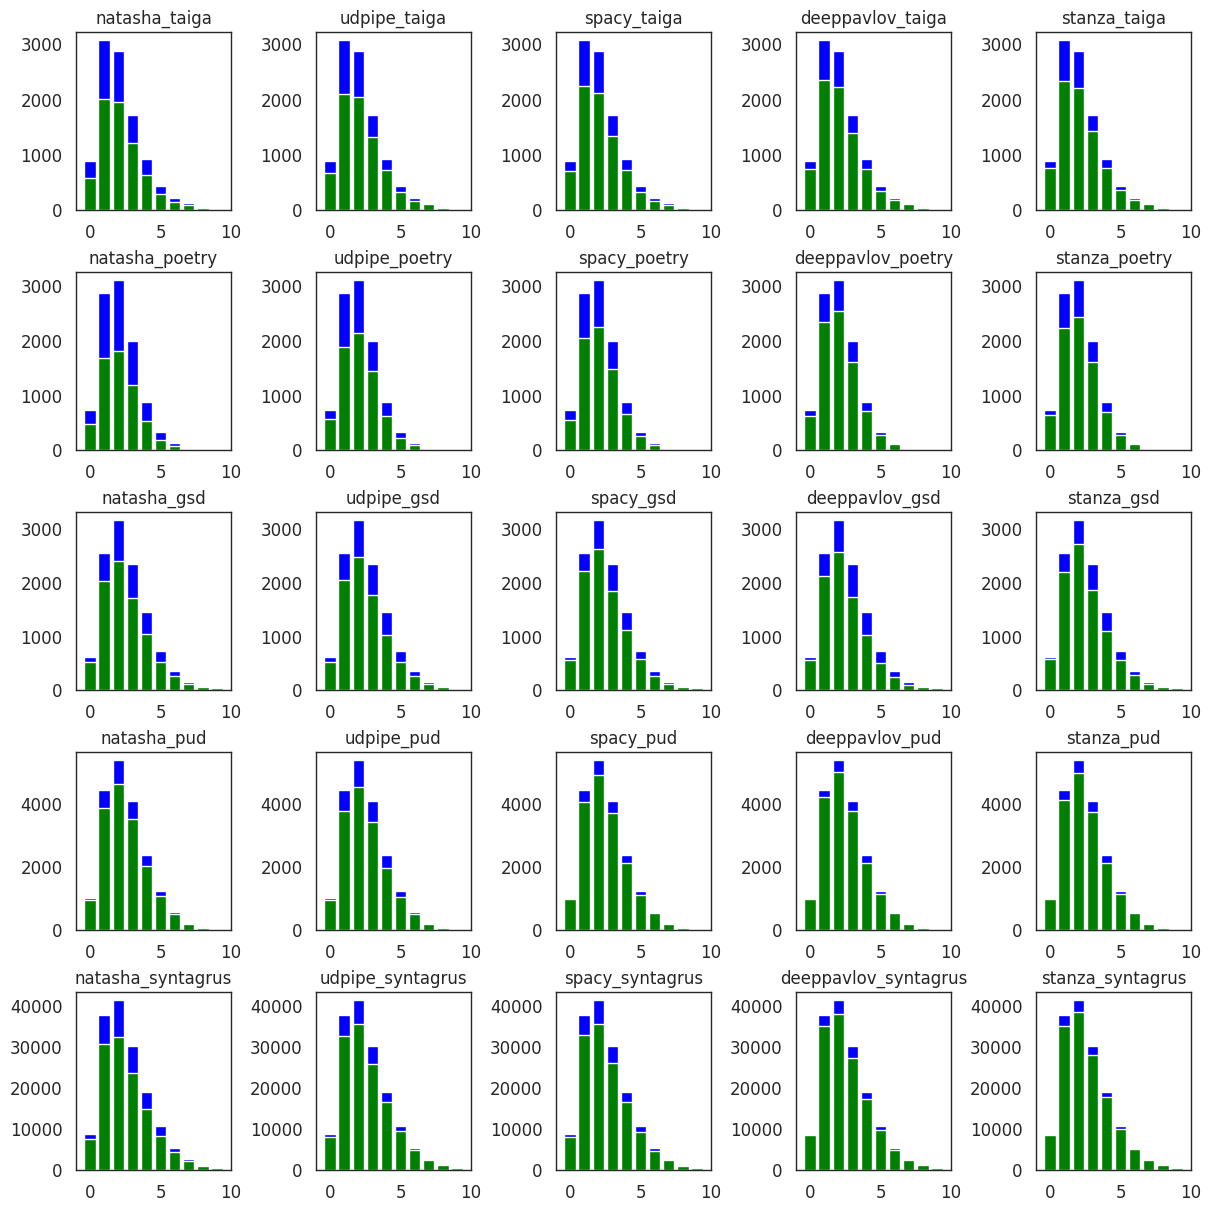

In [90]:
f, axs = plt.subplots(len(treebank_names), len(parser_names), figsize=(12, 12), constrained_layout=True)

for tr_i, tr in enumerate(treebank_names):
  for p_i, p in enumerate(parser_names):
    max_x = min(len(gold_depth_stat[p][tr]), 10)
    positions = np.array(range(max_x))
    d = gold_depth_stat[p][tr]["all"].to_dict()
    axs[tr_i][p_i].bar(positions, height=list(d.values())[:max_x], width=0.8, color='blue')
    d = gold_depth_stat[p][tr]["right"].to_dict()
    axs[tr_i][p_i].bar(positions, height=list(d.values())[:max_x], width=0.8, color='green')
    axs[tr_i][p_i].set_title(f"{p}_{tr}")
    axs[tr_i][p_i].set_xlim(-1, 10)
#plt.legend()

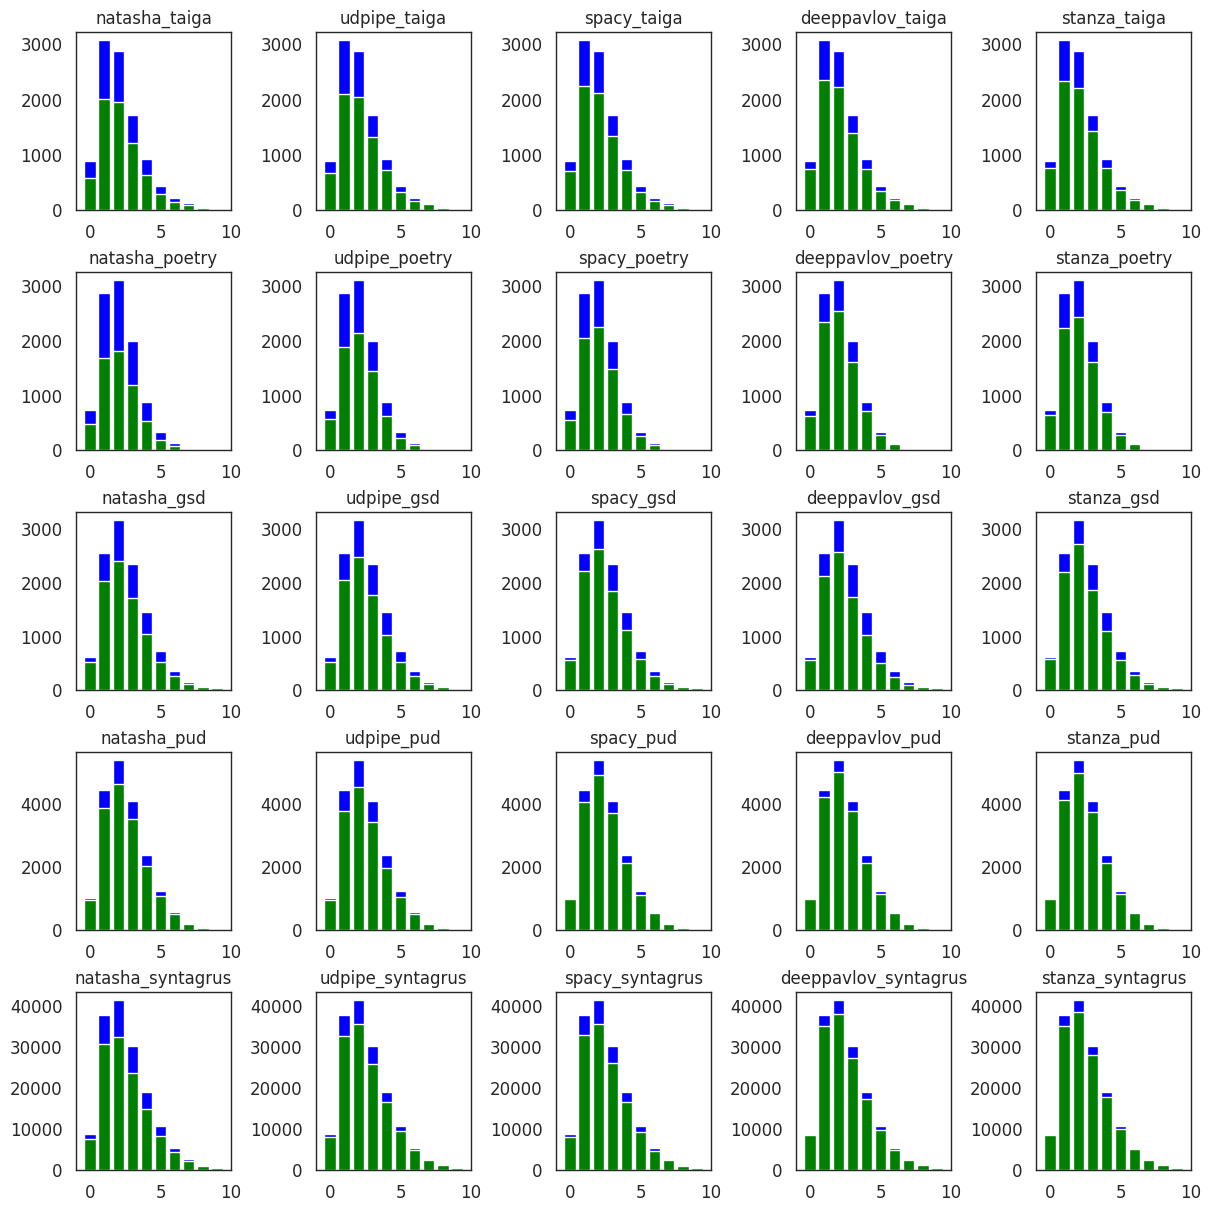

In [91]:
f, axs = plt.subplots(len(treebank_names), len(parser_names), figsize=(12, 12), constrained_layout=True)

for tr_i, tr in enumerate(treebank_names):
  for p_i, p in enumerate(parser_names):
    max_x = min(len(gold_depth_stat[p][tr]), 10)
    positions = np.array(range(max_x))
    d = gold_depth_stat[p][tr]["all"].to_dict()
    axs[tr_i][p_i].bar(positions, height=list(d.values())[:max_x], width=0.8, color='blue')
    d = gold_depth_stat[p][tr]["right"].to_dict()
    axs[tr_i][p_i].bar(positions, height=list(d.values())[:max_x], width=0.8, color='green')
    axs[tr_i][p_i].set_title(f"{p}_{tr}")
    axs[tr_i][p_i].set_xlim(-1, 10)
#plt.legend()

In [92]:
gold_depth_stat[p][tr]

,right,right_percent,all
gold_depth,,,
1,8433,0.958295,8800
2,35069,0.933183,37580
3,38357,0.929056,41286
4,27987,0.930543,30076
5,17697,0.929025,19049
6,9998,0.929528,10756
7,5039,0.928335,5428
8,2495,0.927165,2691
9,1137,0.941225,1208


In [93]:
gold_depth_stat[p][tr]['all'].sum()

np.int64(157718)

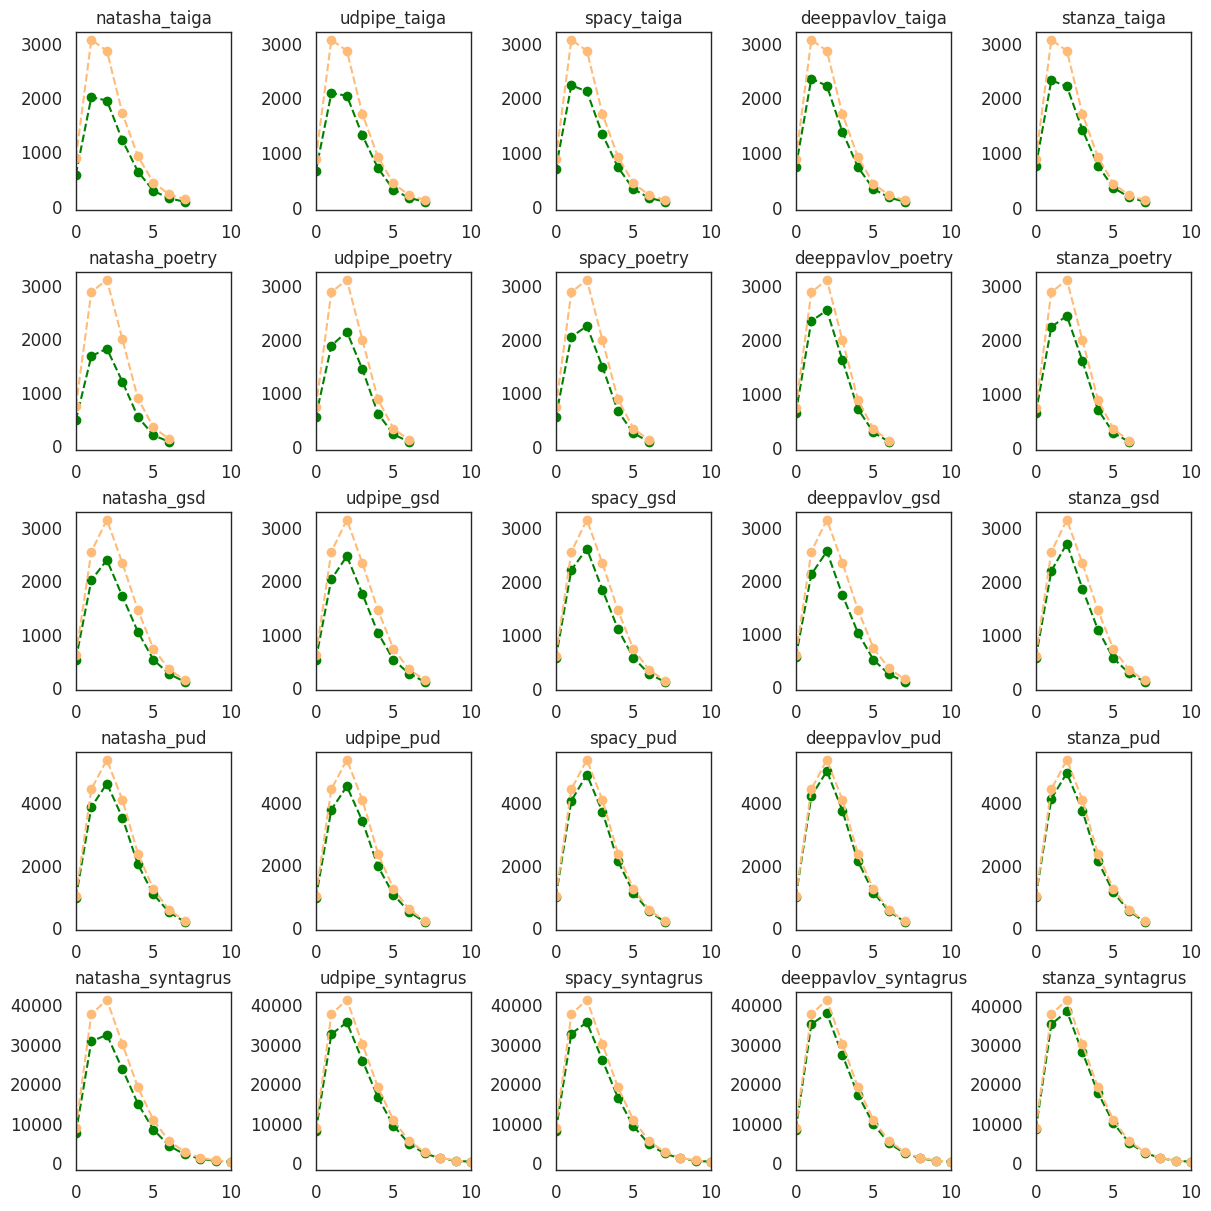

In [94]:
f, axs = plt.subplots(len(treebank_names), len(parser_names), figsize=(12, 12), constrained_layout=True)

for tr_i, tr in enumerate(treebank_names):
  for p_i, p in enumerate(parser_names):
    axs[tr_i][p_i].plot(list(map(lambda s: s[0] if s[2] > 100 else None, gold_depth_stat[p][tr].values)), ls="--", marker="o", label=p, color='g')
    axs[tr_i][p_i].plot(list(map(lambda s: s[2] if s[2] > 100 else None, gold_depth_stat[p][tr].values)), ls="--", marker="o", label=p)

    axs[tr_i][p_i].set_title(f"{p}_{tr}")
    axs[tr_i][p_i].set_xlim(0, 10)
#plt.legend()

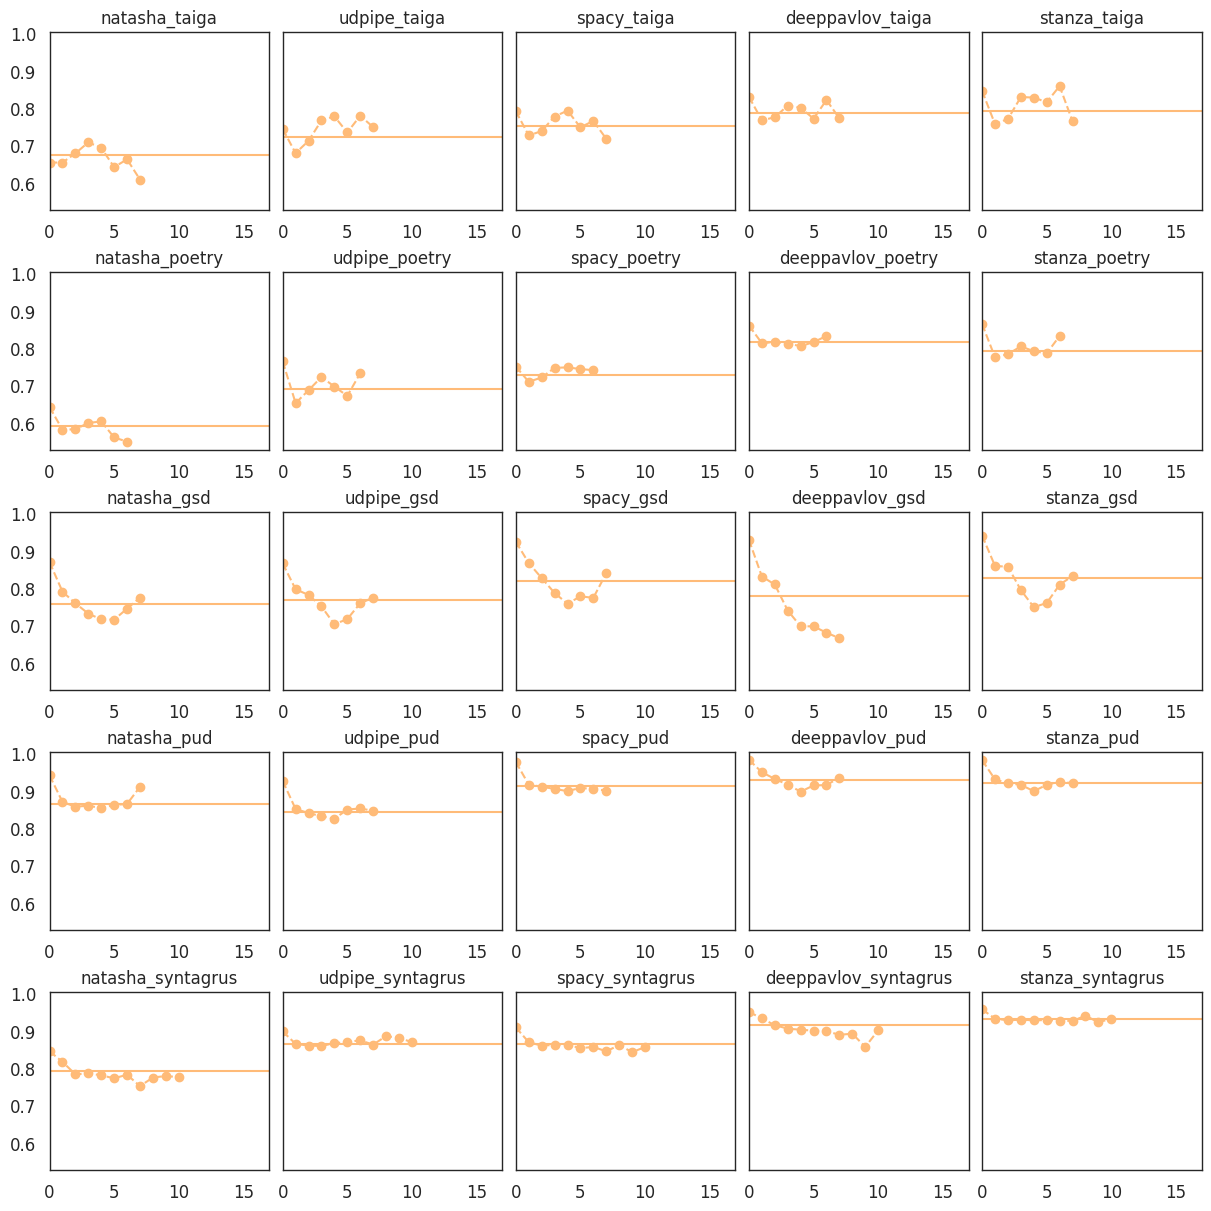

In [95]:
f, axs = plt.subplots(len(treebank_names), len(parser_names), figsize=(12, 12), sharey=True, constrained_layout=True)

for tr_i, tr in enumerate(treebank_names):
  for p_i, p in enumerate(parser_names):
    axs[tr_i][p_i].plot(list(map(lambda s: s[1] if s[2] > 100 else None, gold_depth_stat[p][tr].values)), ls="--", marker="o", label=p)
    axs[tr_i][p_i].set_title(f"{p}_{tr}")
    axs[tr_i][p_i].set_xlim(0, 17)
    axs[tr_i][p_i].axhline(len(result_df[tr][result_df[tr]['gold_parent'] == result_df[tr][f"{p}_parent"]]) / len(result_df[tr]))
#plt.legend()

In [96]:
gold_depth_stat

{'stanza': {'taiga':             right  right_percent   all
  gold_depth                            
  1             746       0.846765   881
  2            2320       0.757922  3061
  3            2206       0.771868  2858
  4            1416       0.830499  1705
  5             757       0.829135   913
  6             352       0.816705   431
  7             184       0.859813   214
  8              98       0.765625   128
  9              30       0.937500    32
  10             12       0.750000    16
  11             12       0.923077    13
  12              5       0.500000    10
  13              3       0.750000     4
  14              2       0.666667     3
  15              2       0.500000     4
  16              0       0.000000     1,
  'poetry':             right  right_percent   all
  gold_depth                            
  1             630       0.865385   728
  2            2228       0.776036  2871
  3            2434       0.784655  3102
  4            1598       0

## gold_dependency_length

In [97]:
'''gold_dep_len = { p: {} for tr in treebank_names }
for p in parser_names:
  gold_dep_len[p] = {}
  for tr in treebank_names:
    gold_dep_len[p][tr] = create_property_stat(result_df[tr], p, 'gold_dependency')'''

"gold_dep_len = { p: {} for tr in treebank_names }\nfor p in parser_names:\n  gold_dep_len[p] = {}\n  for tr in treebank_names:\n    gold_dep_len[p][tr] = create_property_stat(result_df[tr], p, 'gold_dependency')"

In [98]:
result_df[tr]

,sent_i,gold_token,gold_parent,gold_type,gold_pos,gold_relation,gold_depth,natasha_parent,natasha_type,udpipe_parent,udpipe_type,spacy_parent,spacy_type,deeppavlov_parent,deeppavlov_type,stanza_parent,stanza_type
0,2003Armeniya.xml_1,"(0, 1)","(12, 18)",case,ADP,case,3,"(12, 18)",case,"(12, 18)",case,"(12, 18)",case,"(12, 18)",case,"(12, 18)",case
1,2003Armeniya.xml_1,"(2, 11)","(12, 18)",amod,ADJ,amod,3,"(12, 18)",amod,"(12, 18)",amod,"(12, 18)",amod,"(12, 18)",amod,"(12, 18)",amod
2,2003Armeniya.xml_1,"(12, 18)","(60, 70)",obl,NOUN,obl,2,"(60, 70)",obl,"(60, 70)",obl,"(60, 70)",obl,"(60, 70)",obl,"(60, 70)",obl
3,2003Armeniya.xml_1,"(19, 26)","(12, 18)",nmod,NOUN,nmod,3,"(12, 18)",nmod,"(12, 18)",nmod,"(12, 18)",nmod,"(12, 18)",nmod,"(12, 18)",nmod
4,2003Armeniya.xml_1,"(27, 32)","(60, 70)",obj,NOUN,obj,2,"(60, 70)",nsubj,"(60, 70)",nsubj,"(60, 70)",nsubj,"(60, 70)",nsubj,"(60, 70)",nsubj
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157713,2020_RFFIMoskva_2042.xml_742,"(37, 40)","(29, 36)",nsubj,PRON,nsubj,3,"(29, 36)",nsubj,"(29, 36)",nsubj,"(29, 36)",nsubj,"(29, 36)",nsubj,"(29, 36)",nsubj
157714,2020_RFFIMoskva_2042.xml_742,"(41, 42)","(54, 64)",cc,CCONJ,cc,4,"(54, 64)",cc,"(54, 64)",cc,"(54, 64)",cc,"(54, 64)",cc,"(54, 64)",cc
157715,2020_RFFIMoskva_2042.xml_742,"(43, 53)","(54, 64)",advmod,ADV,advmod,4,"(54, 64)",advmod,"(54, 64)",advmod,"(54, 64)",advmod,"(54, 64)",advmod,"(54, 64)",advmod
157716,2020_RFFIMoskva_2042.xml_742,"(54, 64)","(29, 36)",conj,VERB,conj,3,"(29, 36)",conj,"(29, 36)",conj,"(29, 36)",conj,"(29, 36)",conj,"(29, 36)",conj


# Result saving

In [100]:
import shutil
shutil.make_archive('pics', 'tar', '/content/pics/')

'/content/pics.tar'

In [101]:
from google.colab import files
files.download('pics.tar')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Time results

In [ ]:
# all parsing, in seconds (from parser running notebook)
all_time_dict = {}
all_time_dict['gsd'] = {'udpipe': 10.036, 'stanza': 481.504, 'natasha': 3.267, 'deeppavlov': 131.280,'spacy': 12.119}
all_time_dict['pud'] = {'udpipe': 18.135, 'stanza': 830.284, 'natasha': 4.613, 'deeppavlov': 193.175,'spacy': 21.383}
all_time_dict['syntagrus'] = {'udpipe': 137.007, 'stanza': 7495.900, 'natasha': 49.834, 'deeppavlov': 1613.516,'spacy': 172.897}
all_time_dict['poetry'] = {'udpipe': 8.961, 'stanza': 469.055, 'natasha': 2.908, 'deeppavlov': 118.674,'spacy': 12.741}
all_time_dict['taiga'] = {'udpipe': 8.741, 'stanza': 532.078, 'natasha': 3.381, 'deeppavlov': 130.404,'spacy': 13.954}

In [ ]:
avg_time_dict = {t: {} for t in treebank_names}
for t in treebank_names:
  for p in parser_names:
    avg_time_dict[t][p] = all_time_dict[t][p] / len(treebanks[t])

In [ ]:
avg_time_df = pd.DataFrame([[avg_time_dict[treebank][p]
                          for treebank in treebank_names] for p in parser_names],
                        index=parser_titles, columns=treebank_titles)

In [ ]:
{p: [avg_time_dict[t][p] for t in treebank_names] for p in parser_names}

In [ ]:
#avg_time_df.iloc['treebank average'] = {p: [avg_time_dict[t][p] for t in treebank_names] for p in parser_names}

In [ ]:
avg_time_df.round(3)

In [ ]:
#display(Latex(create_latex(avg_time_df.round(3).astype('str'))))

In [ ]:
for p in parser_names:
  p_times = [avg_time_dict[t][p] for t in treebank_names]
  print(p, f"{sum(p_times) / len(p_times):.3f} s")